# Directory

In [1]:
directory = ""
    
print(directory)

# Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime 
from datetime import date


#dates
import matplotlib.dates as mdates

#mtick for percentages in axes
import matplotlib.ticker as mtick

#colormaps
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import seaborn as sns

print("libraries imported!")

libraries imported!


# variables

In [3]:
plt.style.use("Solarize_Light2")

In [4]:
ordenado = ['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']

In [5]:
habitantes = pd.read_csv("https://raw.githubusercontent.com/dquintani/covid/main/habitantes.csv",index_col = 0)
habitantes = habitantes[['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']]

habitantes.to_csv(directory + "habitantes.csv")
habitantes

Bolivia   La Paz  Cochabamba  Santa Cruz   Oruro  Potosí  Chuquisaca  \
NaN  11620000  2927000     2029000     3370000  538000  902000      637000   

     Tarija    Beni   Pando  
NaN  583000  480000  154000

# CASOS

Casos diarios y acumulados

In [6]:
casos_diarios = pd.read_csv("https://github.com/mauforonda/covid19-bolivia-udape/raw/master/confirmados_diarios.csv",
                    index_col = 0)
casos_diarios["Bolivia"] = casos_diarios.sum(axis=1)
casos_diarios = casos_diarios[['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']]
casos_diarios.to_csv(directory + "casos_diarios.csv")
casos_diarios.index = pd.to_datetime(casos_diarios.index)
casos_diarios

Bolivia  La Paz  Cochabamba  Santa Cruz  Oruro  Potosí  \
2020-03-10        0       0           0           0      0       0   
2020-03-11        1       0           0           1      0       0   
2020-03-12        0       0           0           0      0       0   
2020-03-13        7       0           1           0      6       0   
2020-03-14        0       0           0           0      0       0   
...             ...     ...         ...         ...    ...     ...   
2022-01-04     9242     293         988        6047    170     165   
2022-01-05    10263     497        1322        6286    307     122   
2022-01-06    11002     812        1213        6143    455     447   
2022-01-07    11190     811        1360        5552    538     426   
2022-01-08     7823     830         845        3432    585     522   

            Chuquisaca  Tarija  Beni  Pando  
2020-03-10           0       0     0      0  
2020-03-11           0       0     0      0  
2020-03-12           0       0     0      0  
2020-03-13           0       0     0      0  
2020-03-14           0       0     0      0  
...                ...     ...   ...    ...  
2022-01-04         545     708   289     37  
2022-01-05         669     747   277     36  
2022-01-06         806     832   266     28  
2022-01-07        1074     993   394     42  
2022-01-08         763     651   181     14  

[670 rows x 10 columns]

In [7]:
#promedio movil casos
casos_diarios7 = casos_diarios.rolling(7).mean()
casos_diarios7 = casos_diarios7.round(decimals=0)

#casos_diarios7

In [8]:
casos_acumulados = casos_diarios.cumsum(axis = 0)
casos_acumulados.to_csv(directory + "casos_acumulados.csv")

casos_acumulados

Bolivia  La Paz  Cochabamba  Santa Cruz  Oruro  Potosí  \
2020-03-10        0       0           0           0      0       0   
2020-03-11        1       0           0           1      0       0   
2020-03-12        1       0           0           1      0       0   
2020-03-13        8       0           1           1      6       0   
2020-03-14        8       0           1           1      6       0   
...             ...     ...         ...         ...    ...     ...   
2022-01-04   631462  115004       88399      255036  27128   25680   
2022-01-05   641725  115501       89721      261322  27435   25802   
2022-01-06   652727  116313       90934      267465  27890   26249   
2022-01-07   663917  117124       92294      273017  28428   26675   
2022-01-08   671740  117954       93139      276449  29013   27197   

            Chuquisaca  Tarija   Beni  Pando  
2020-03-10           0       0      0      0  
2020-03-11           0       0      0      0  
2020-03-12           0       0      0      0  
2020-03-13           0       0      0      0  
2020-03-14           0       0      0      0  
...                ...     ...    ...    ...  
2022-01-04       39763   49653  22298   8501  
2022-01-05       40432   50400  22575   8537  
2022-01-06       41238   51232  22841   8565  
2022-01-07       42312   52225  23235   8607  
2022-01-08       43075   52876  23416   8621  

[670 rows x 10 columns]

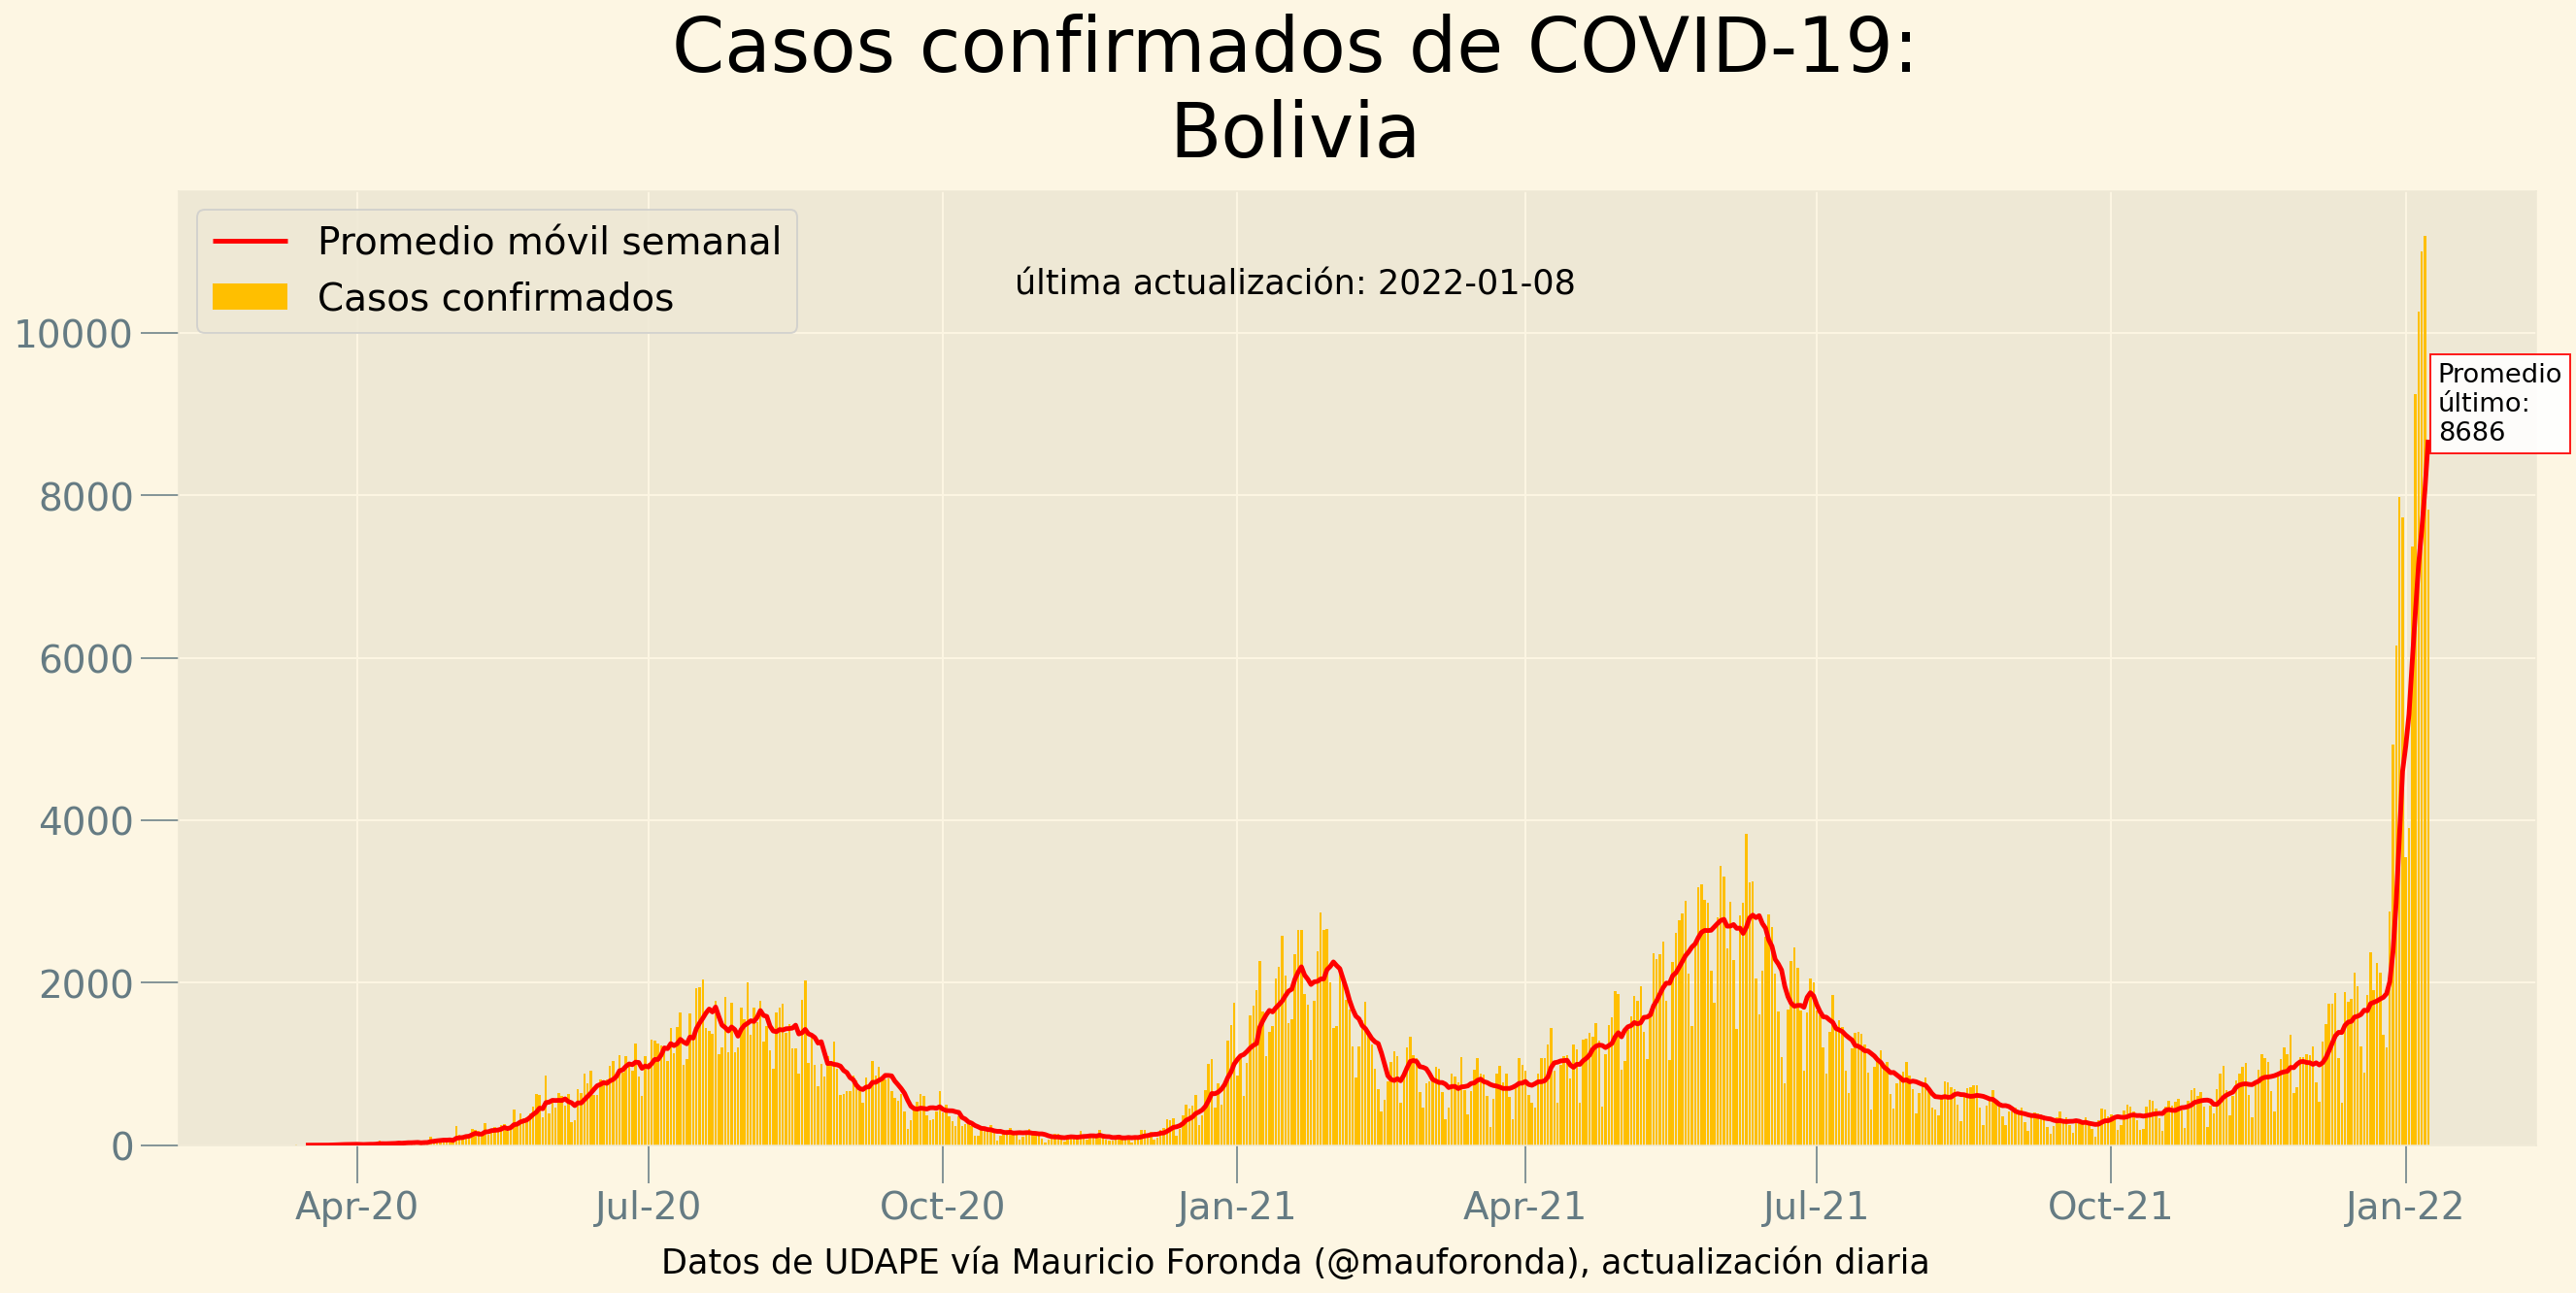

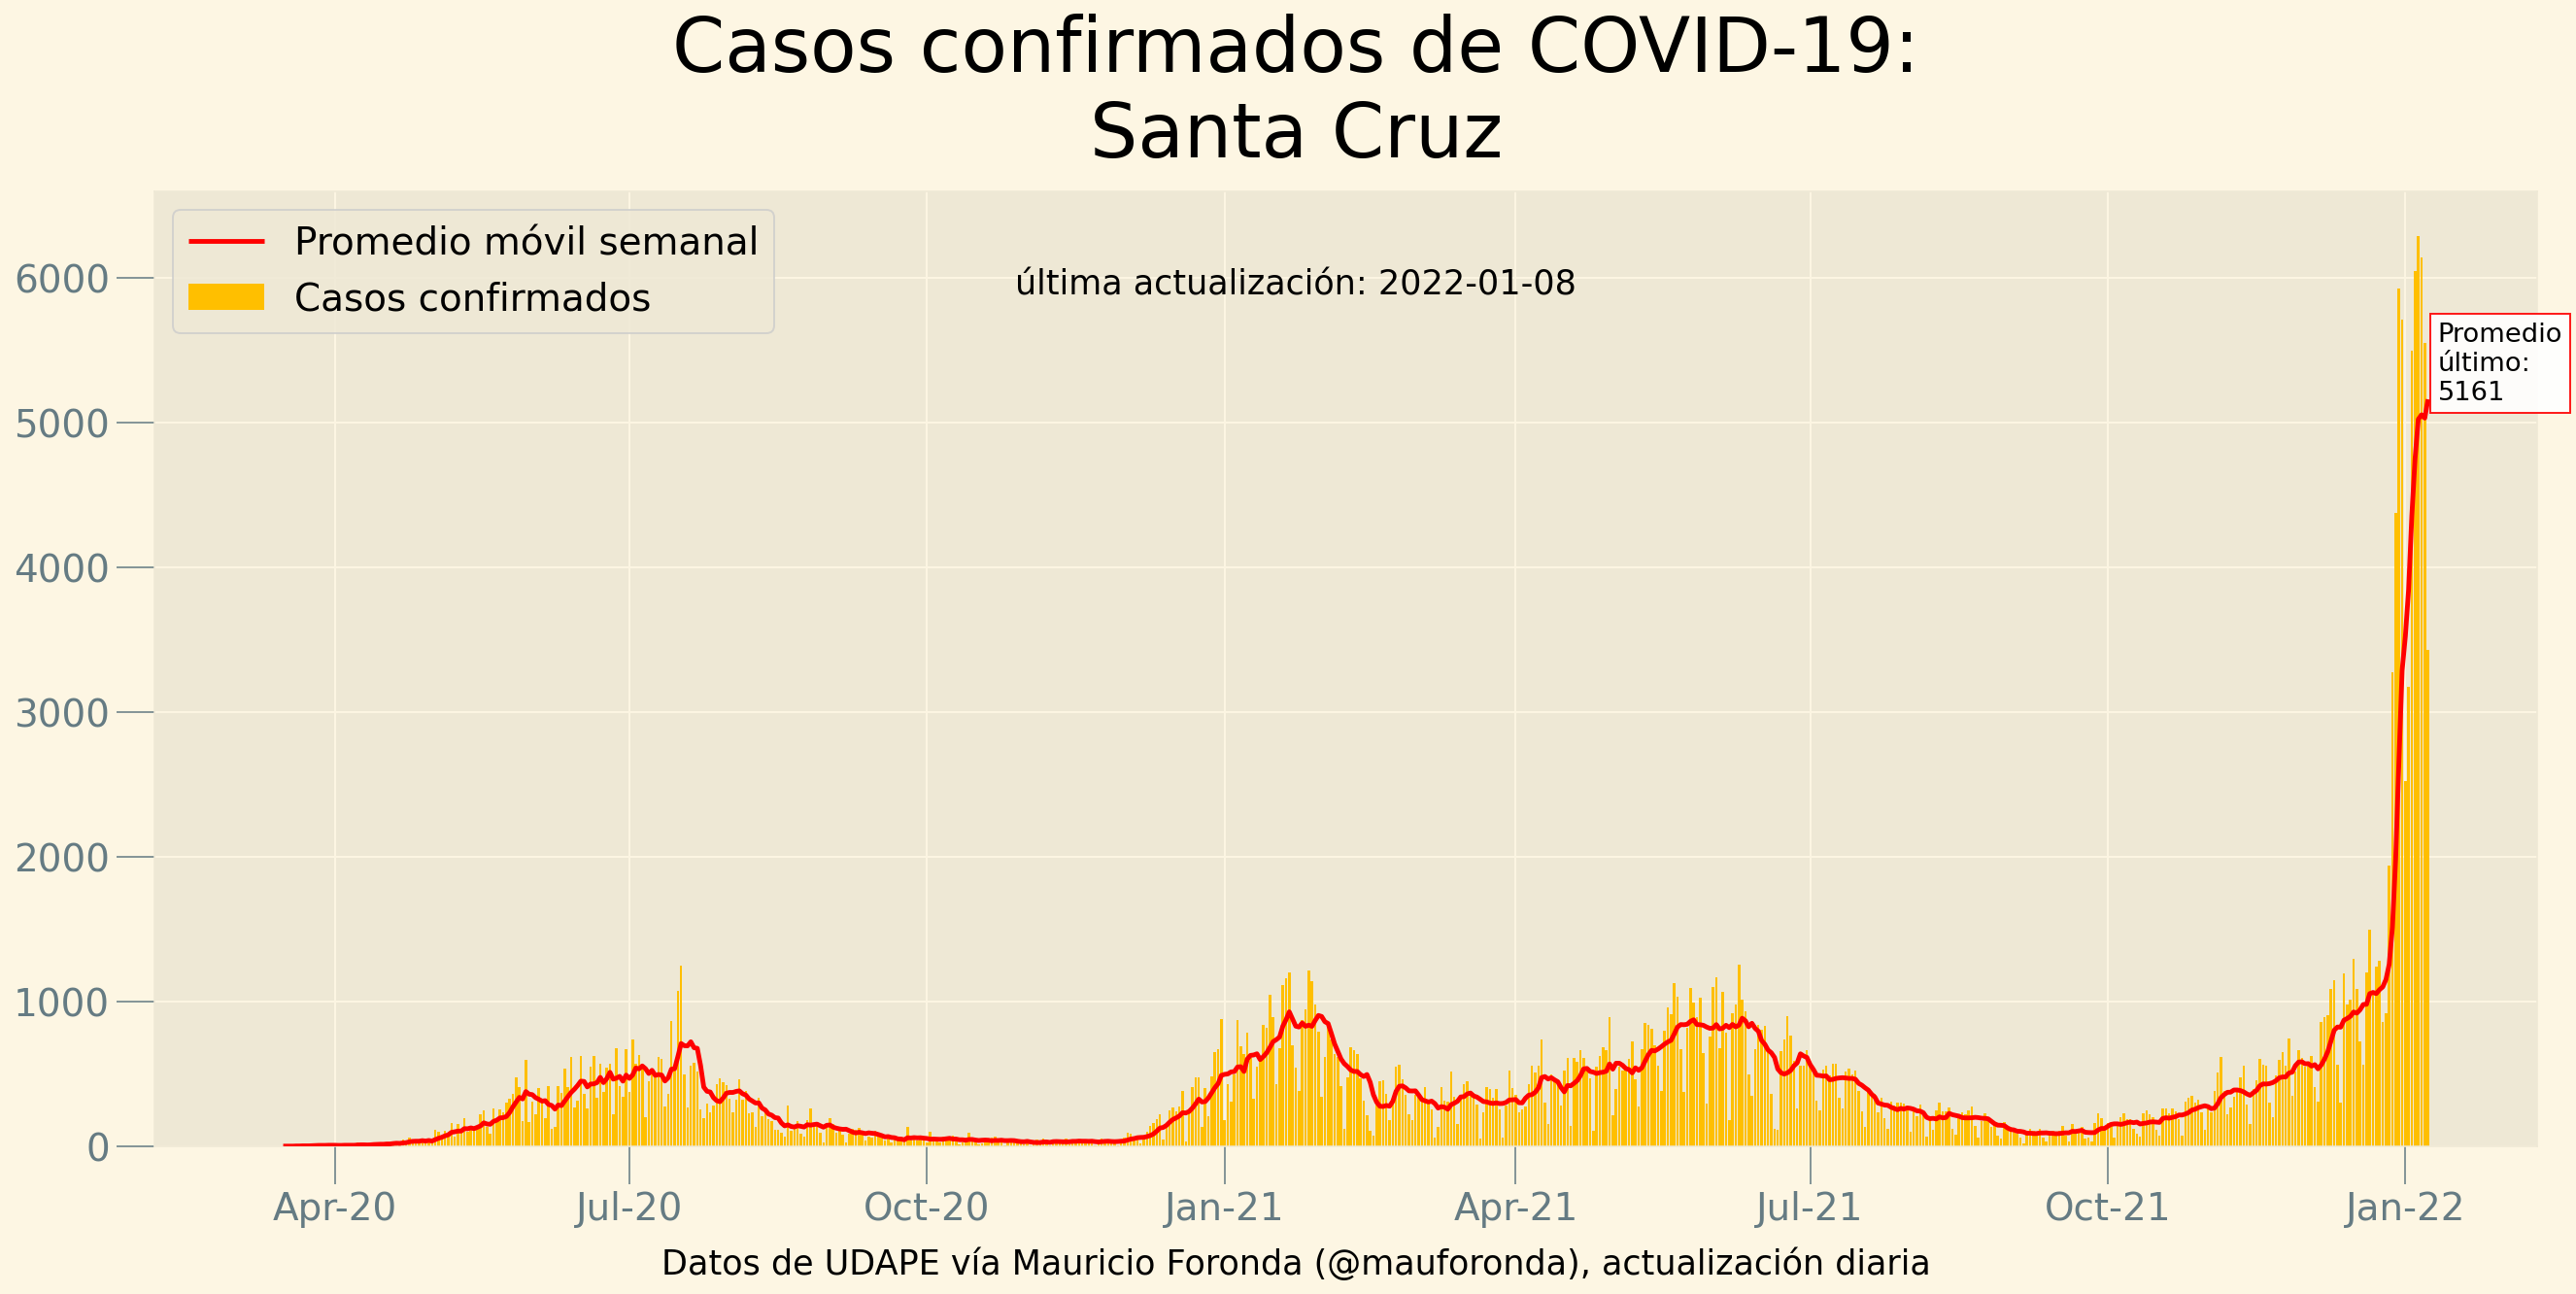

In [9]:
def single_plot(i, start_day=0):
    fig, axs = plt.subplots(1,1, figsize = (19,9), dpi=140)

    fig.suptitle("Casos confirmados de COVID-19:\n{}".format(i), fontsize= 40,y=1.0)
    fig.text(.5, .77, "última actualización: {}".format(casos_diarios.index[-1].date()), ha="center", fontsize=18)
    fig.text(0.5,-.03 ,"Datos de UDAPE vía Mauricio Foronda (@mauforonda), actualización diaria", ha="center", fontsize=18)


    axs.grid(zorder=3)
    axs.bar(casos_diarios.index[start_day:], casos_diarios.loc[:,i][start_day:], 
             color = "#ffbf00", 
             label="Casos confirmados",
             width = .75, 
             zorder=2)
    axs.plot(casos_diarios.index[start_day:], casos_diarios7.loc[:,i][start_day:], color = "r", label="Promedio móvil semanal",zorder=3, linewidth=2.5)
    #axs[i].set_ylim(0,casos_diarios7[casos_diarios7.columns[i]].max()*1.20)
    #axs[i].set_xlim(casos_diarios.index[30], casos_diarios.index[-1] + datetime.timedelta(days=10))
    axs.xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))


    axs.annotate( "Promedio\núltimo:\n" + str(casos_diarios7.loc[:,i][-1].astype(int)),
      xy = (casos_diarios7.index[-1] + datetime.timedelta(days=3), casos_diarios7.loc[:,i][-1]),
      fontsize=14,
      color = "black",
      bbox={
              'edgecolor': 'r',
              'facecolor': 'w', 
              'alpha': .9}
          )

    axs.legend(loc="upper left", fontsize=20)
    axs.tick_params("both", size=20, labelsize=20)

    fig.tight_layout(pad=0.5, w_pad=0.8, h_pad=2.5)

single_plot('Bolivia')
single_plot("Santa Cruz")

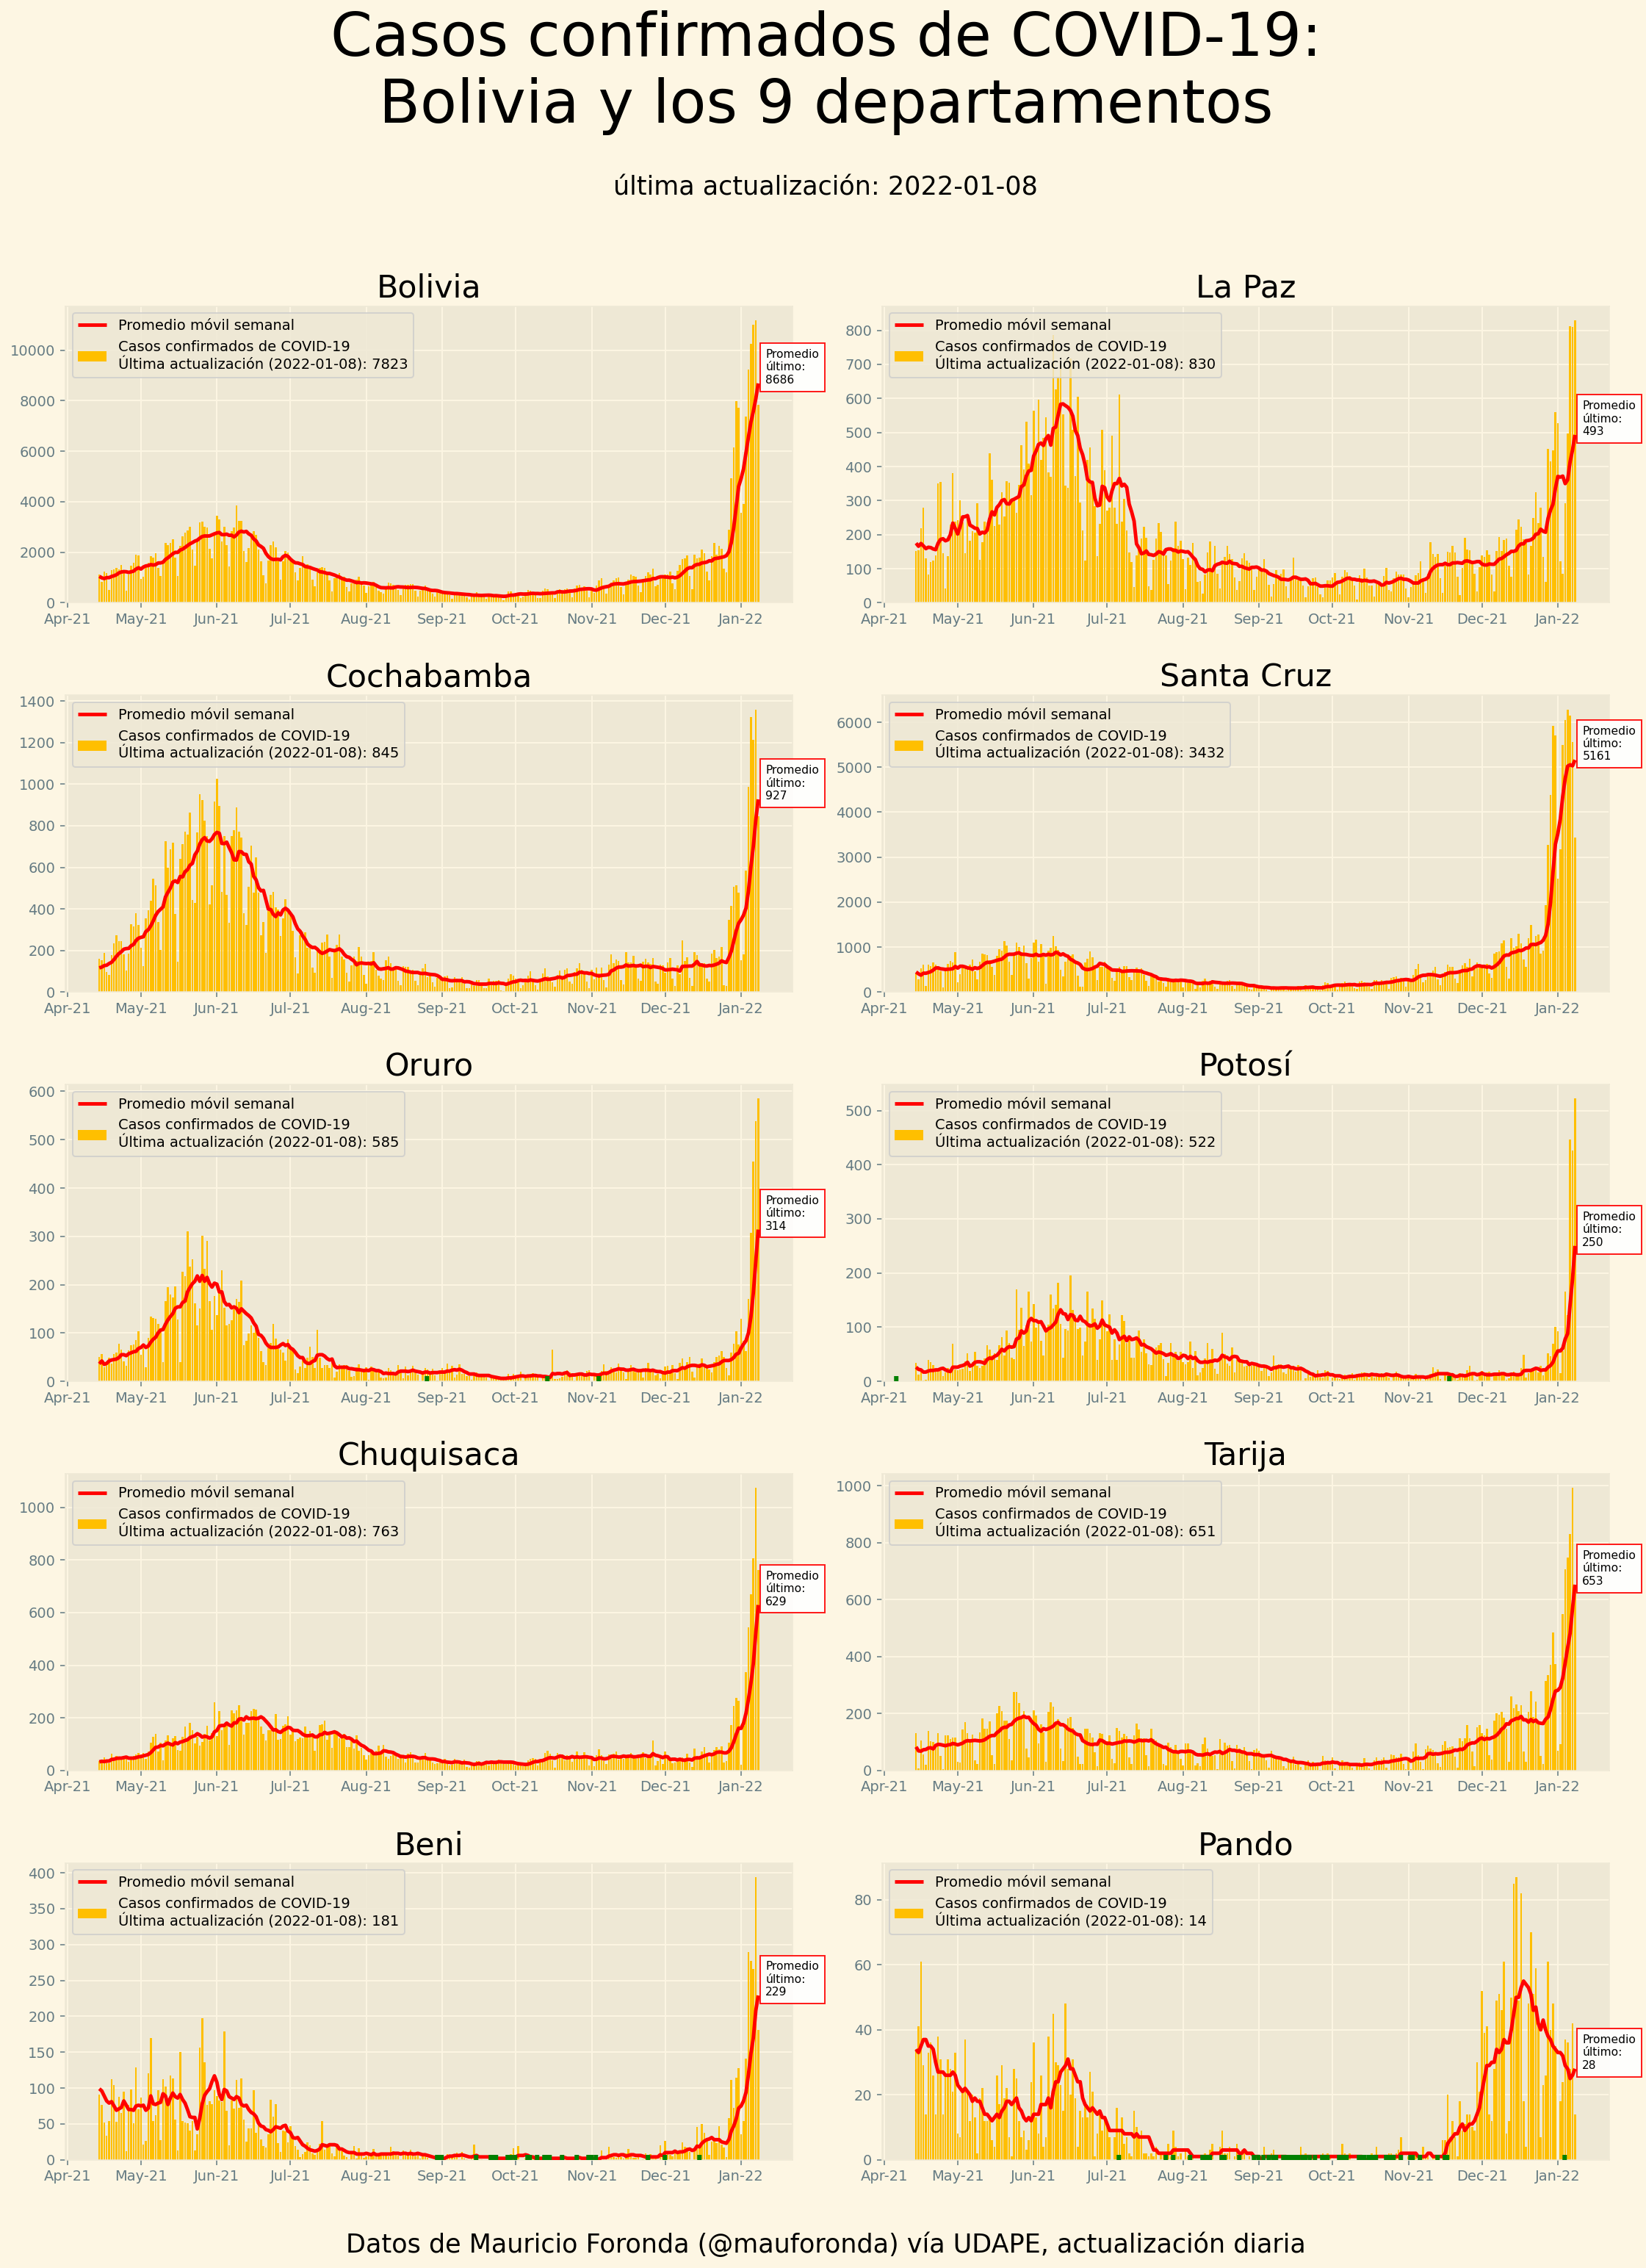

In [10]:
fig, axs = plt.subplots(5,2, figsize = (16,20), dpi=140)
axs = axs.flatten()

fig.suptitle("Casos confirmados de COVID-19:\nBolivia y los 9 departamentos", fontsize= 42, y=1.06)
fig.text(.5, .97, "última actualización: {}".format(casos_diarios.index[-1].date()), ha="center", fontsize=18)
fig.text(0.5,-.03 ,"Datos de Mauricio Foronda (@mauforonda) vía UDAPE, actualización diaria", ha="center", fontsize=18)

start_day = 400

for i in range(10):
    axs[i].grid(zorder=3)
    axs[i].bar(casos_diarios.index[start_day:], casos_diarios[casos_diarios.columns[i]][start_day:], 
             color = "#ffbf00", 
             label="Casos confirmados de COVID-19\nÚltima actualización ({}): {}".format(casos_diarios.index[-1].date(),casos_diarios.iloc[-1,i].astype(int)),
             width = .75, 
             zorder=2)
    axs[i].set_title(casos_diarios.columns[i], fontsize = 22)
    axs[i].plot(casos_diarios.index[start_day:], casos_diarios7[casos_diarios7.columns[i]][start_day:], color = "r", label="Promedio móvil semanal",zorder=3, linewidth=2.5)
    #axs[i].set_ylim(0,casos_diarios7[casos_diarios7.columns[i]].max()*1.20)
    #axs[i].set_xlim(casos_diarios.index[30], casos_diarios.index[-1] + datetime.timedelta(days=10))
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))


    axs[i].annotate( "Promedio\núltimo:\n" + str(casos_diarios7.iloc[-1,i].astype(int)),
      xy = (casos_diarios7.index[-1] + datetime.timedelta(days=3), casos_diarios7.iloc[-1,i]),
      fontsize=8,
      color = "black",
      bbox={
              'edgecolor': 'r',
              'facecolor': 'w', 
              'alpha': .9}
          )
    #if casos_diarios.iloc[:,i]==0:
    no_cases_df= casos_diarios[casos_diarios.iloc[:,i]==0].iloc[:,i]
    for k in range(len(no_cases_df)):
                 axs[i].annotate(text=".",
                     xy=(no_cases_df.index[k], no_cases_df[k]),
                     fontsize=30,
                     color="g",
                     label="0 casos en este día"
                                )
    axs[i].legend(loc="upper left")

fig.tight_layout(pad=0.5, w_pad=0.8, h_pad=2.5)

In [11]:
fig.savefig(directory + "graficas/casos_todos.jpg", bbox_inches="tight")

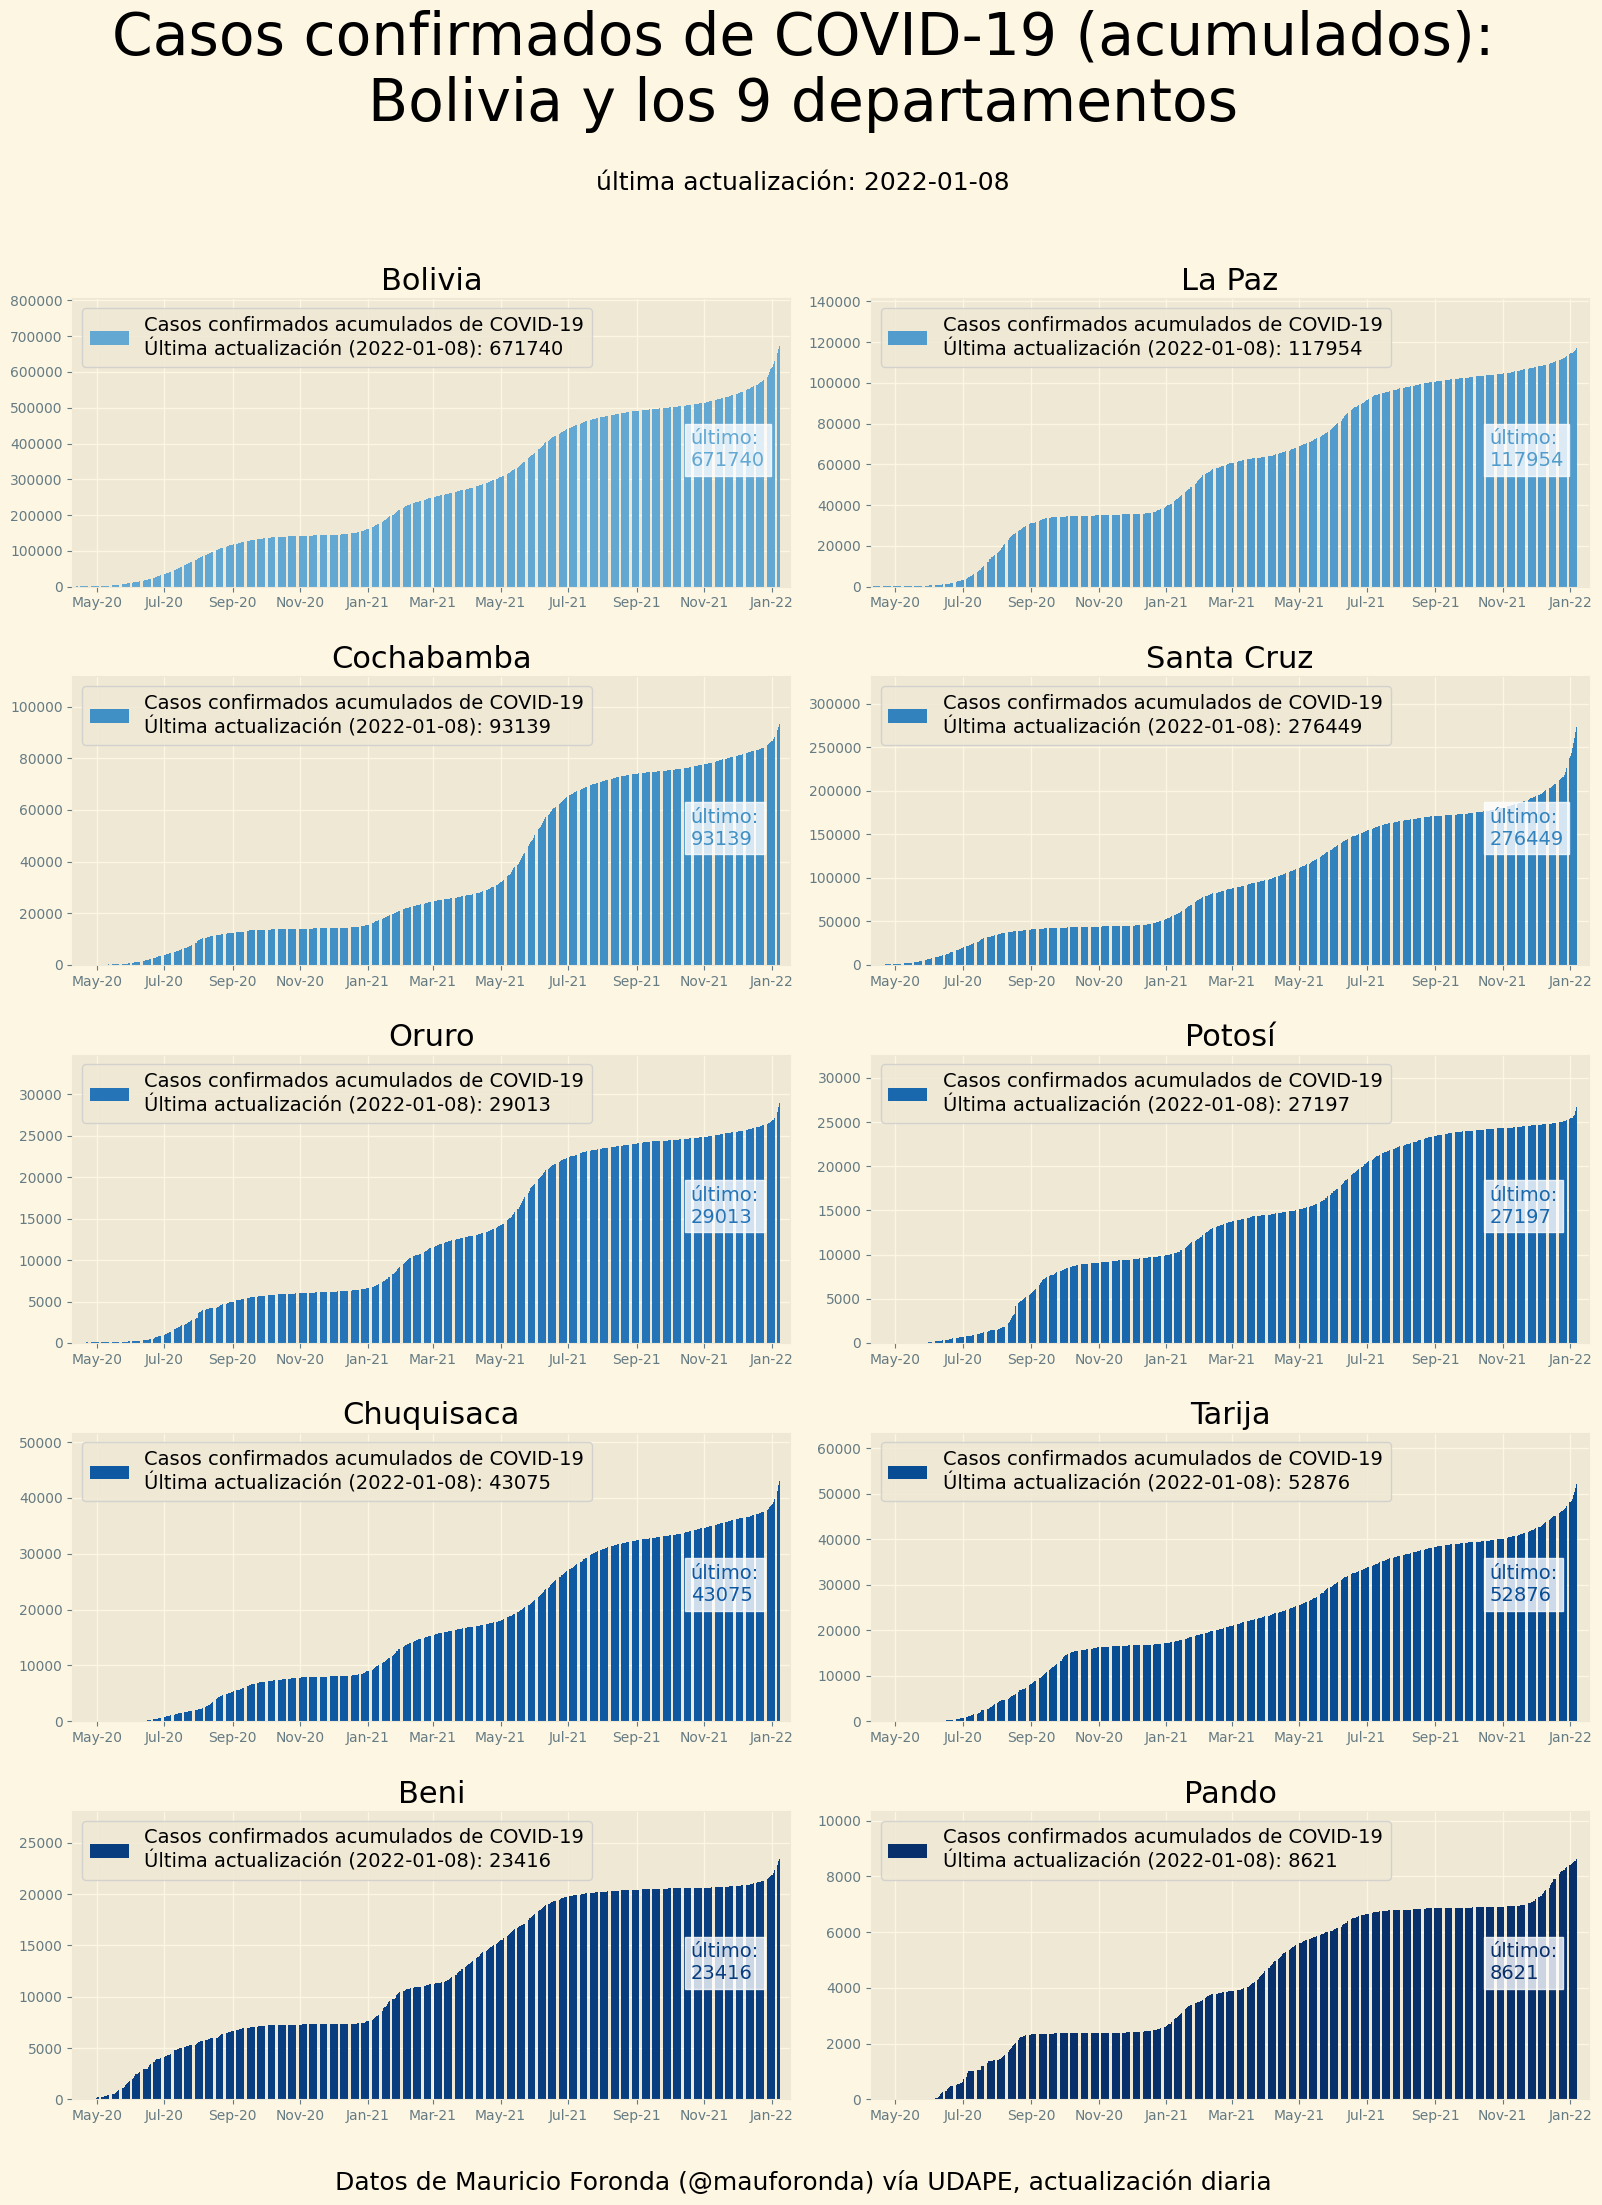

In [12]:
fig, axs = plt.subplots(5,2, figsize = (16,20), 
                        dpi=100,
                        sharey=False
                        )
axs = axs.flatten()


fig.suptitle("Casos confirmados de COVID-19 (acumulados):\nBolivia y los 9 departamentos", fontsize= 42, y=1.06)
fig.text(.5, .97, "última actualización: {}".format(casos_acumulados.index[-1].date()), ha="center", fontsize=18)
fig.text(0.5,-.03 ,"Datos de Mauricio Foronda (@mauforonda) vía UDAPE, actualización diaria", ha="center", fontsize=18)


for i in range(10):
  axs[i].grid(zorder=3)
  axs[i].bar(casos_acumulados.index, casos_acumulados[casos_acumulados.columns[i]], 
             color = plt.get_cmap("Blues",20)(range(10,20))[i], 
             label="Casos confirmados acumulados de COVID-19\nÚltima actualización ({}): {}".format(casos_acumulados.index[-1].date(),casos_acumulados.iloc[-1,i].astype(int)),
             width = .75, 
             zorder=2)
  axs[i].set_title(casos_acumulados.columns[i], fontsize = 22)
  #axs[i].plot(casos_diarios.index, casos_diarios7[casos_diarios7.columns[i]], color = "r", label="Promedio móvil semanal",zorder=3, linewidth=4)
  #axs[i].set_facecolor(background_color2)
  axs[i].set_ylim(0,casos_acumulados[casos_acumulados.columns[i]].max()*1.20)
  axs[i].set_xlim(casos_acumulados.index[30], casos_acumulados.index[-1] + datetime.timedelta(days=10))
  axs[i].legend(loc="upper left", fontsize=14)
  axs[i].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))

  
  axs[i].annotate( "último:\n" + str(casos_acumulados.iloc[-1,i].astype(int)),
      xy = (casos_acumulados.index[-1] - datetime.timedelta(days=80), casos_acumulados.iloc[-1,i]/2),
      fontsize=14,
      color = cm.get_cmap("Blues",20)(range(10,20))[i],
      bbox={
              'edgecolor': 'w',
              'facecolor': 'w', 
              'alpha': .8}
          )


fig.tight_layout(pad=0.5, w_pad=0.8, h_pad=2.5)


In [13]:
fig.savefig(directory + "graficas/casos_todos_acum.jpg", bbox_inches="tight")

# Muertes

In [14]:
muertes_diarias = pd.read_csv("https://github.com/mauforonda/covid19-bolivia-udape/raw/master/decesos_diarios.csv",
                    index_col = 0)
muertes_diarias["Bolivia"] = muertes_diarias.sum(axis=1)
muertes_diarias = muertes_diarias[['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']]

muertes_diarias.to_csv(directory + "muertes_diarias.csv")
muertes_diarias.index = pd.to_datetime(muertes_diarias.index)

muertes_diarias

Bolivia  La Paz  Cochabamba  Santa Cruz  Oruro  Potosí  \
2020-03-10        0       0           0           0      0       0   
2020-03-11        0       0           0           0      0       0   
2020-03-12        0       0           0           0      0       0   
2020-03-13        0       0           0           0      0       0   
2020-03-14        0       0           0           0      0       0   
...             ...     ...         ...         ...    ...     ...   
2022-01-04       47       5           4          34      0       0   
2022-01-05       38       7           5          20      2       0   
2022-01-06       40       7           1          18      5       0   
2022-01-07       45       6           3          27      2       1   
2022-01-08       24       3           3          14      1       0   

            Chuquisaca  Tarija  Beni  Pando  
2020-03-10           0       0     0      0  
2020-03-11           0       0     0      0  
2020-03-12           0       0     0      0  
2020-03-13           0       0     0      0  
2020-03-14           0       0     0      0  
...                ...     ...   ...    ...  
2022-01-04           1       2     1      0  
2022-01-05           1       1     2      0  
2022-01-06           2       3     2      2  
2022-01-07           0       4     2      0  
2022-01-08           0       0     3      0  

[670 rows x 10 columns]

In [15]:
muertes_diarias7 = muertes_diarias.rolling(7).mean()
muertes_diarias7 = muertes_diarias7.round(decimals=1)
# muertes_diarias7.tail()

In [16]:
muertes_acumuladas = muertes_diarias.cumsum(axis = 0)
muertes_acumuladas.to_csv(directory + "muertes_acumuladas.csv")

muertes_acumuladas

Bolivia  La Paz  Cochabamba  Santa Cruz  Oruro  Potosí  \
2020-03-10        0       0           0           0      0       0   
2020-03-11        0       0           0           0      0       0   
2020-03-12        0       0           0           0      0       0   
2020-03-13        0       0           0           0      0       0   
2020-03-14        0       0           0           0      0       0   
...             ...     ...         ...         ...    ...     ...   
2022-01-04    18087    2798        2877        6324   1367     872   
2022-01-05    18125    2805        2882        6344   1369     872   
2022-01-06    18165    2812        2883        6362   1374     872   
2022-01-07    18210    2818        2886        6389   1376     873   
2022-01-08    18234    2821        2889        6403   1377     873   

            Chuquisaca  Tarija  Beni  Pando  
2020-03-10           0       0     0      0  
2020-03-11           0       0     0      0  
2020-03-12           0       0     0      0  
2020-03-13           0       0     0      0  
2020-03-14           0       0     0      0  
...                ...     ...   ...    ...  
2022-01-04        1446    1158   916    329  
2022-01-05        1447    1159   918    329  
2022-01-06        1449    1162   920    331  
2022-01-07        1449    1166   922    331  
2022-01-08        1449    1166   925    331  

[670 rows x 10 columns]

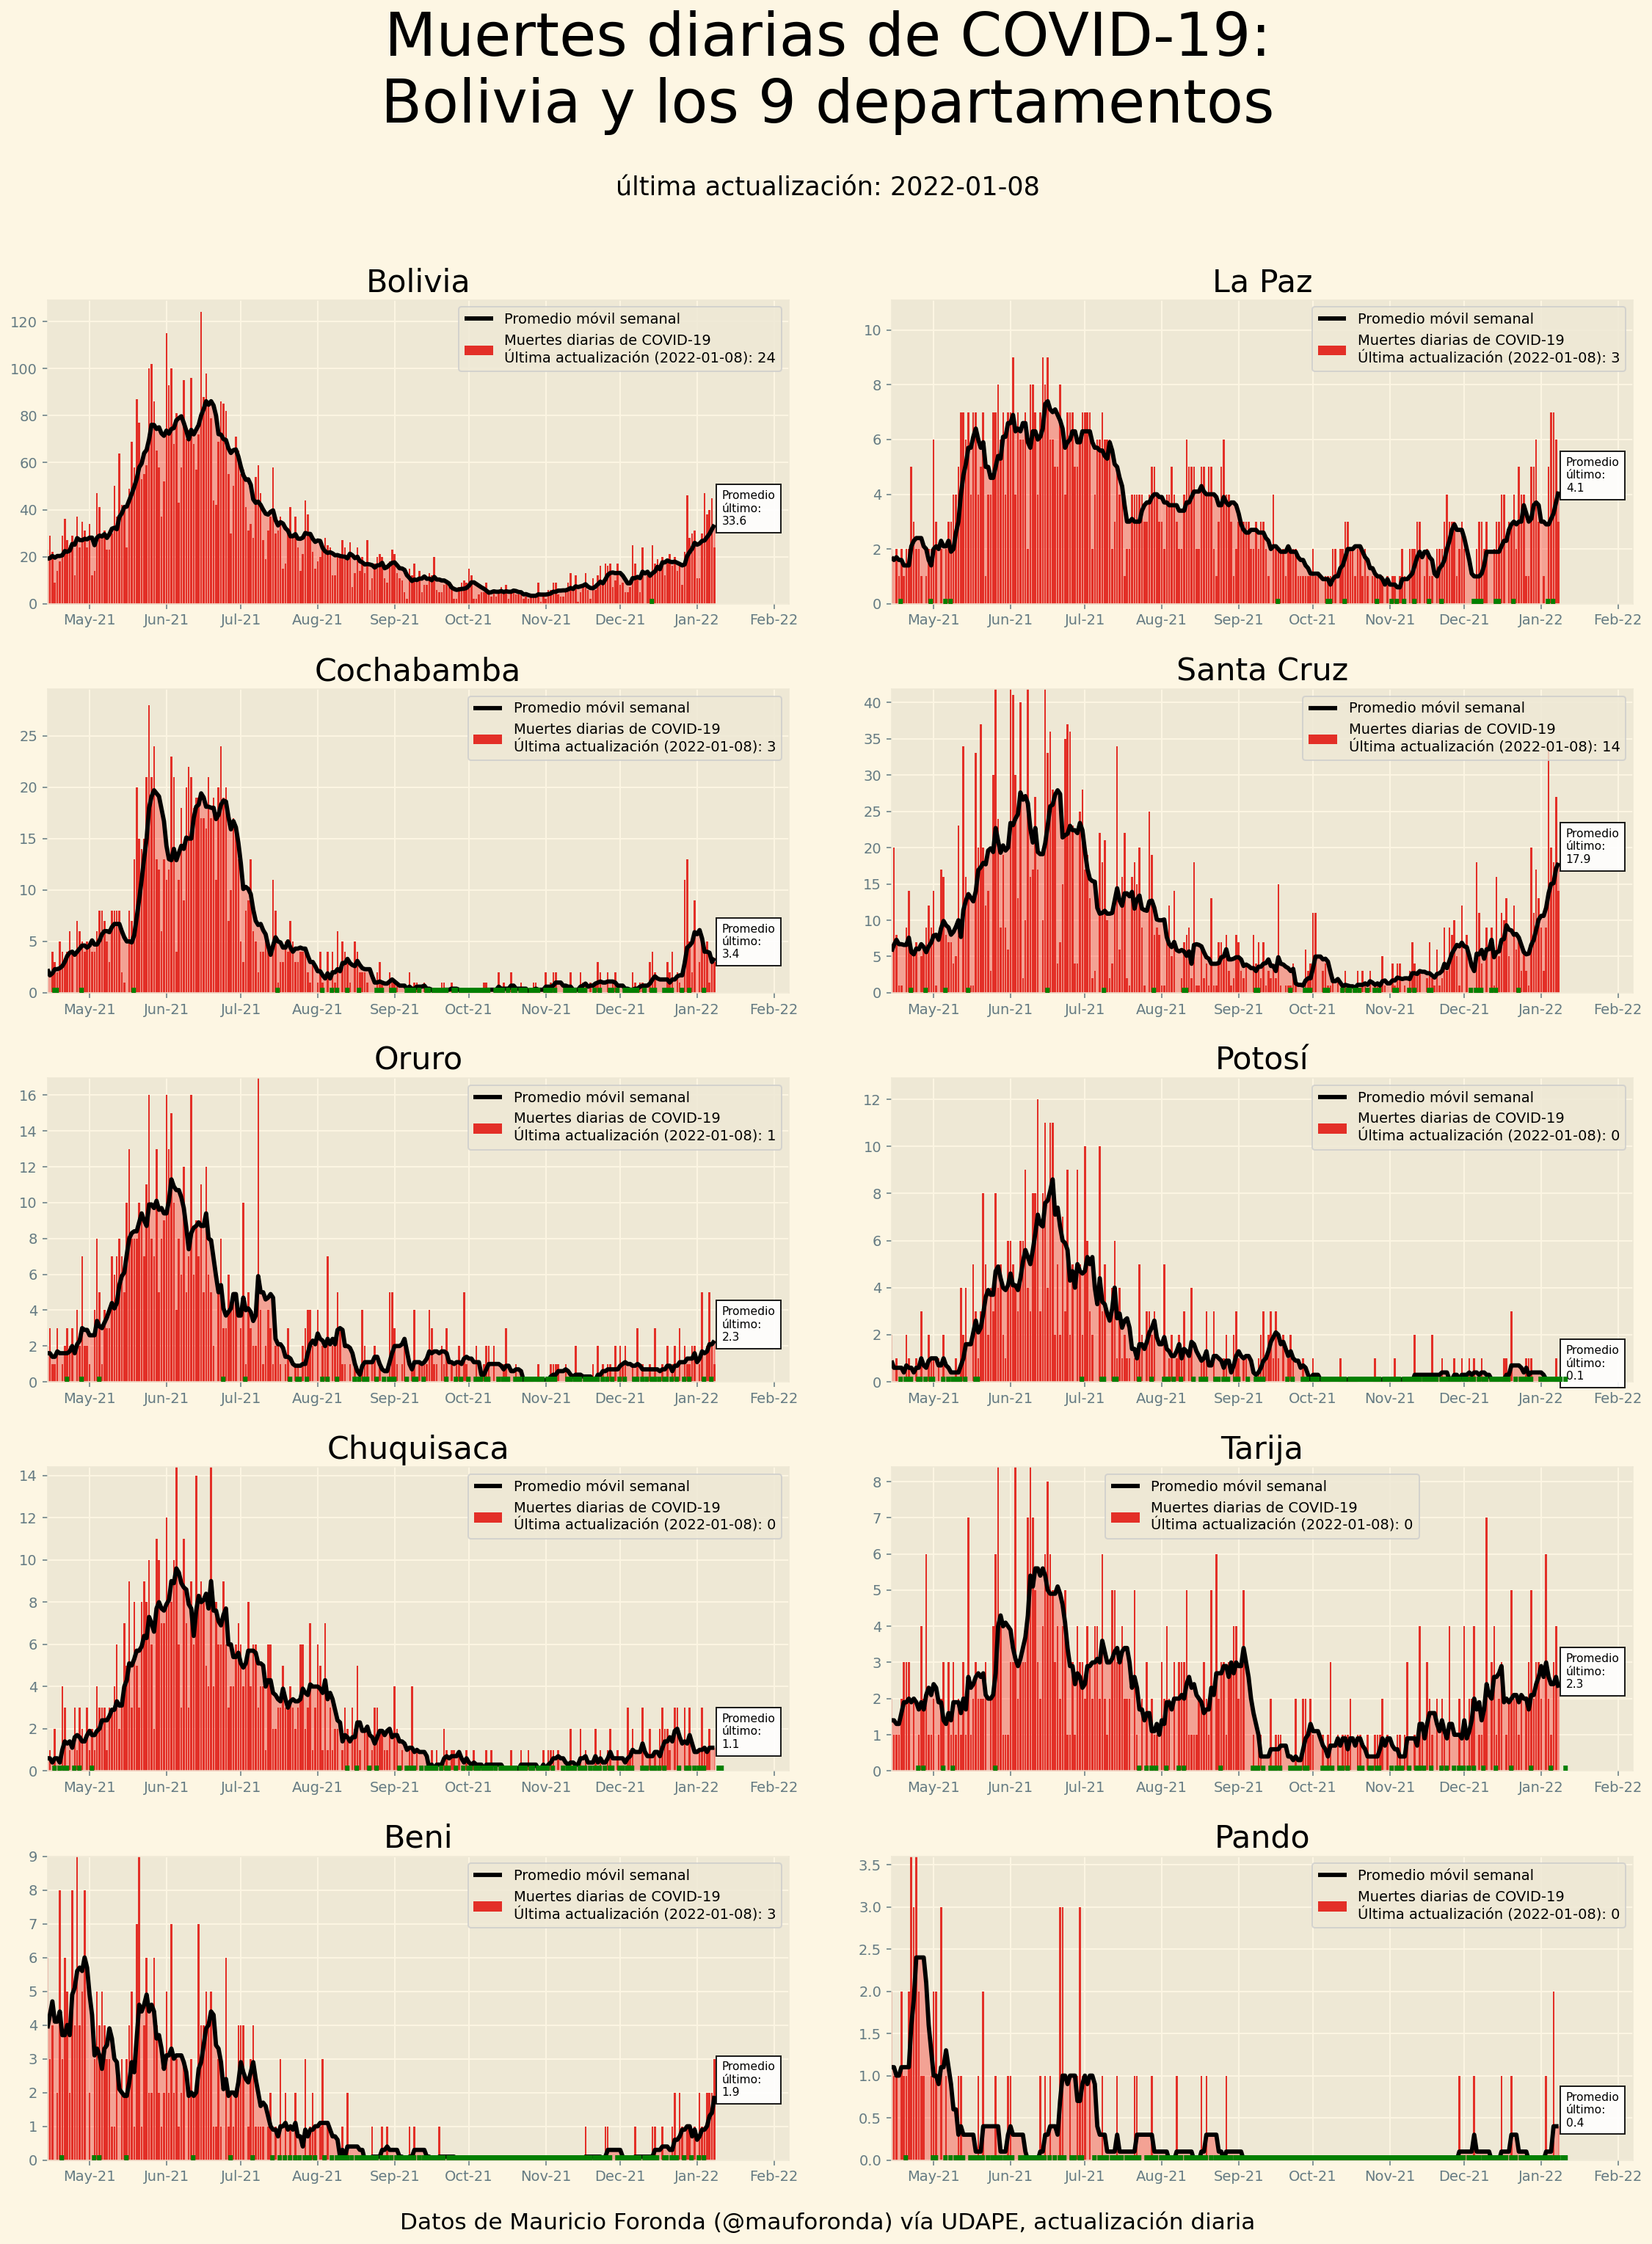

In [17]:
fig, axs = plt.subplots(5,2, figsize = (16,20), dpi=140)
axs = axs.flatten()

start_day = 400


fig.suptitle("Muertes diarias de COVID-19:\nBolivia y los 9 departamentos", fontsize= 42, y=1.06)
fig.text(0.5, .97,"última actualización: {}".format(muertes_diarias.index[-1].date()), ha="center", fontsize=18)
fig.text(0.5,-.02,"Datos de Mauricio Foronda (@mauforonda) vía UDAPE, actualización diaria", ha="center", fontsize=16)

for i in range(10):
    axs[i].grid(zorder=3)
    axs[i].bar(muertes_diarias.index[start_day:], muertes_diarias[muertes_diarias.columns[i]][start_day:], #color = "r", 
             label="Muertes diarias de COVID-19\nÚltima actualización ({}): {}".format(muertes_diarias.index[-1].date(),muertes_diarias.iloc[-1,i].astype(int)),
             width=.75 ,zorder=2,
             color=plt.get_cmap("Reds", 10)(range(6,7)))
    axs[i].set_title(muertes_diarias.columns[i], fontsize=22)
    axs[i].plot(muertes_diarias.index[start_day:], muertes_diarias7[muertes_diarias7.columns[i]][start_day:], color = "black", label="Promedio móvil semanal", zorder=3, linewidth=3)
    axs[i].fill_between(muertes_diarias.index[start_day:], muertes_diarias7[muertes_diarias7.columns[i]][start_day:], color = "red", zorder=1, alpha=.3)
    # axs[i].set_facecolor(background_color2)
    axs[i].set_ylim(0,muertes_diarias7[muertes_diarias7.columns[i]][start_day:].max()*1.5)
    axs[i].set_xlim(muertes_diarias.index[start_day], muertes_diarias.index[-1] + datetime.timedelta(days=30))
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))


    axs[i].annotate( "Promedio\núltimo:\n" + str(muertes_diarias7.iloc[-1,i]),
      xy = (muertes_diarias7.index[-1] + datetime.timedelta(days=3), muertes_diarias7.iloc[-1,i]),
      fontsize=8,
      color = "black",
      bbox={
              'edgecolor': 'black',
              'facecolor': 'w', 
              'alpha': .9}
          )

    #if casos_diarios.iloc[:,i]==0:
    no_deaths_df= muertes_diarias[muertes_diarias.iloc[:,i]==0].iloc[:,i]
    for k in range(len(no_deaths_df)):
                 axs[i].annotate(text=".",
                     xy=(no_deaths_df.index[k], no_deaths_df[k]),
                     fontsize=30,
                     color="g",
                     label="0 muertes en este día")
    axs[i].legend()

fig.tight_layout(pad=0.3, w_pad=4, h_pad=2)

In [18]:
muertes_fig = fig.savefig(directory + "graficas/muertes_todos.jpg", bbox_inches="tight")

# Pruebas
Pruebas acumuladas = (casos acumulados)+(descartados acumulados)

In [19]:
desc_y_sosp_edu = pd.read_csv("https://raw.githubusercontent.com/pr0nstar/covid19-data/master/processed/bolivia/testing.csv",
                    index_col = 0)
desc_y_sosp_edu = desc_y_sosp_edu[desc_y_sosp_edu.columns].apply(pd.to_numeric, errors = "coerce")
desc_y_sosp_edu.index = pd.to_datetime(desc_y_sosp_edu.index)

desc_y_sosp_edu

La Paz  Unnamed: 2  Cochabamba  Unnamed: 4  Santa Cruz  \
Fecha                                                                
NaT            NaN         NaN         NaN         NaN         NaN   
2020-05-07    51.0      2294.0        25.0      1159.0         NaN   
2020-05-08    64.0      2399.0        29.0      1203.0         NaN   
2020-05-09    67.0      2515.0        29.0      1244.0         NaN   
2020-05-10    57.0      2578.0        29.0      1252.0         NaN   
...            ...         ...         ...         ...         ...   
2022-01-04     NaN    529714.0         NaN    456873.0         NaN   
2022-01-05     NaN    531337.0         NaN    458691.0         NaN   
2022-01-06     NaN    533371.0         NaN    460251.0         NaN   
2022-01-07     NaN    535622.0         NaN    462036.0         NaN   
2022-01-08     NaN    537501.0         NaN    463042.0         NaN   

            Unnamed: 6  Oruro  Unnamed: 8  Potosi  Unnamed: 10  Tarija  \
Fecha                                                                    
NaT                NaN    NaN         NaN     NaN          NaN     NaN   
2020-05-07      3444.0    2.0       465.0    20.0        156.0    15.0   
2020-05-08      3532.0    1.0       472.0    20.0        170.0    10.0   
2020-05-09      3638.0   15.0       475.0    33.0        186.0    10.0   
2020-05-10      3889.0    0.0       492.0     4.0        215.0    25.0   
...                ...    ...         ...     ...          ...     ...   
2022-01-04   1012853.0    NaN     98643.0     NaN      67628.0     NaN   
2022-01-05   1018638.0    NaN     99102.0     NaN      67750.0     NaN   
2022-01-06   1024255.0    NaN     99827.0     NaN      67995.0     NaN   
2022-01-07   1029719.0    NaN    100425.0     NaN      68295.0     NaN   
2022-01-08   1033365.0    NaN    100988.0     NaN      68644.0     NaN   

            Unnamed: 12  Chuquisaca  Unnamed: 14   Beni  Unnamed: 16  Pando  \
Fecha                                                                         
NaT                 NaN         NaN          NaN    NaN          NaN    NaN   
2020-05-07         50.0        22.0        175.0  123.0        230.0   15.0   
2020-05-08         60.0        44.0        176.0    NaN        230.0   13.0   
2020-05-09         61.0         NaN          NaN    NaN        239.0    NaN   
2020-05-10         61.0        29.0        228.0  182.0        244.0    NaN   
...                 ...         ...          ...    ...          ...    ...   
2022-01-04     117893.0         NaN     118165.0    NaN      69565.0    NaN   
2022-01-05     118361.0         NaN     118853.0    NaN      70131.0    NaN   
2022-01-06     118924.0         NaN     119622.0    NaN      70735.0    NaN   
2022-01-07     119585.0         NaN     120692.0    NaN      71371.0    NaN   
2022-01-08     120042.0         NaN     121438.0    NaN      71612.0    NaN   

            Unnamed: 18  
Fecha                    
NaT                 NaN  
2020-05-07         76.0  
2020-05-08         79.0  
2020-05-09          NaN  
2020-05-10          NaN  
...                 ...  
2022-01-04      26339.0  
2022-01-05      26466.0  
2022-01-06      26533.0  
2022-01-07      26615.0  
2022-01-08      26631.0  

[613 rows x 18 columns]

In [20]:
col_names = ['La Paz', 'Cochabamba', 'Santa Cruz','Oruro','Potosí','Tarija','Chuquisaca', 'Beni','Pando']

In [21]:
descartados = desc_y_sosp_edu.iloc[1:,[1,3,5,7,9,11,13,15,17]]
for i in range(9):
    descartados.rename(columns={descartados.columns[i] : col_names[i]}, inplace=True)
descartados["Bolivia"] = descartados.sum(axis=1, min_count=9) #9=departamentos

descartados.to_csv(directory + "descartados_acumulados.csv")


# errores?
# descartados.at["2021-09-17 00:00:00", "Santa Cruz"] = np.nan #pd.datetime(2021,9,3)
# descartados.at["2021-07-20 00:00:00", "Potosí"] = np.nan #2021-07-20 00:00:00
# descartados.at["2021-07-15 00:00:00", "Chuquisaca"] = np.nan #2021-07-15 00:00:00
# descartados.at["2021-05-30 00:00:00", "Beni"] = np.nan
# descartados.at["2021-05-30 00:00:00", "Beni"] = np.nan
# descartados.at["2021-05-30 00:00:00", "Beni"] = np.nan
# descartados.at["2021-05-30 00:00:00", "Beni"] = np.nan


#if previous value is the same, make nan
for i in ordenado:
    descartados.loc[descartados[i].shift(-1) == descartados[i]] = np.nan

descartados

La Paz  Cochabamba  Santa Cruz     Oruro   Potosí    Tarija  \
Fecha                                                                       
2020-05-07       NaN         NaN         NaN       NaN      NaN       NaN   
2020-05-08    2399.0      1203.0      3532.0     472.0    170.0      60.0   
2020-05-09       NaN         NaN         NaN       NaN      NaN       NaN   
2020-05-10    2578.0      1252.0      3889.0     492.0    215.0      61.0   
2020-05-11       NaN         NaN         NaN       NaN      NaN       NaN   
...              ...         ...         ...       ...      ...       ...   
2022-01-04  529714.0    456873.0   1012853.0   98643.0  67628.0  117893.0   
2022-01-05  531337.0    458691.0   1018638.0   99102.0  67750.0  118361.0   
2022-01-06  533371.0    460251.0   1024255.0   99827.0  67995.0  118924.0   
2022-01-07  535622.0    462036.0   1029719.0  100425.0  68295.0  119585.0   
2022-01-08  537501.0    463042.0   1033365.0  100988.0  68644.0  120042.0   

            Chuquisaca     Beni    Pando    Bolivia  
Fecha                                                
2020-05-07         NaN      NaN      NaN        NaN  
2020-05-08       176.0    230.0     79.0     8321.0  
2020-05-09         NaN      NaN      NaN        NaN  
2020-05-10       228.0    244.0      NaN        NaN  
2020-05-11         NaN      NaN      NaN        NaN  
...                ...      ...      ...        ...  
2022-01-04    118165.0  69565.0  26339.0  2497673.0  
2022-01-05    118853.0  70131.0  26466.0  2509329.0  
2022-01-06    119622.0  70735.0  26533.0  2521513.0  
2022-01-07    120692.0  71371.0  26615.0  2534360.0  
2022-01-08    121438.0  71612.0  26631.0  2543263.0  

[612 rows x 10 columns]

In [22]:
############################## No hay sospechosos desde mediados del 2021

# sospechosos = desc_y_sosp_edu.iloc[1:,[0,2,4,6,8,10,12,14,16]]
# #for i in range(9):
# #    sospechosos.rename(columns={sospechosos.columns[i] : col_names[i]}, inplace=True)
# sospechosos["Bolivia"] = sospechosos.sum(axis=1)
# sospechosos.tail(118)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

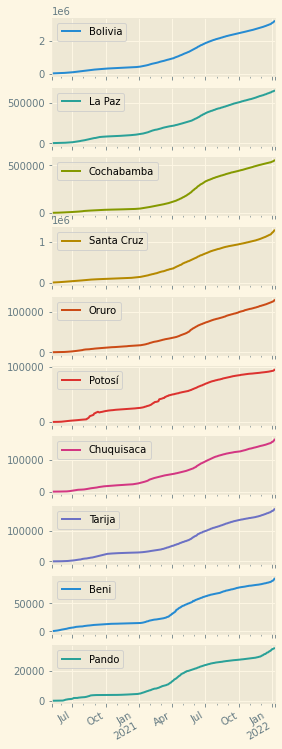

In [23]:
pruebas_acum = casos_acumulados + descartados
pruebas_acum = pruebas_acum.drop(pruebas_acum.index[0:58], axis=0).round(0)
pruebas_acum = pruebas_acum.interpolate()
pruebas_acum = pruebas_acum[['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']]

pruebas_acum.plot(subplots=True, figsize=(4,14))
# pruebas_acum

<AxesSubplot:title={'center':'OWID Patch added dates from march 14 to april 2020'}>

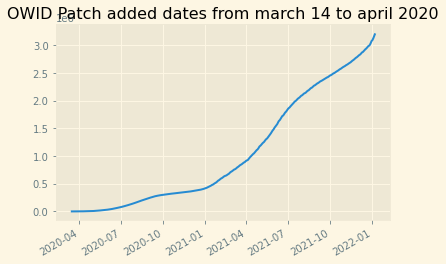

In [24]:
# OWID Patch - add data Add data back to March 14 2020 https://github.com/dquintani/covid/pull/1

owid_patch = pd.read_csv("other/owid_patch.csv", index_col = 0)
owid_patch.index = owid_patch.index.astype(str)
owid_patch.index = pd.to_datetime(owid_patch.index)

#old
# pruebas_acum.to_csv(directory + "pruebas_acum.csv")

#new
pruebas_acum_owid_patch = pd.concat([owid_patch, pruebas_acum])
pruebas_acum_owid_patch = pruebas_acum_owid_patch[~pruebas_acum_owid_patch.index.duplicated(keep='first')]
pruebas_acum_owid_patch.to_csv(directory + "pruebas_acum.csv")
pruebas_acum_owid_patch.Bolivia.plot(title="OWID Patch added dates from march 14 to april 2020")

Bolivia  La Paz  Cochabamba  Santa Cruz   Oruro  Potosí  \
2022-01-04  19666.0  1858.0      2352.0     11086.0   581.0   392.0   
2022-01-05  21919.0  2120.0      3140.0     12071.0   766.0   244.0   
2022-01-06  23186.0  2846.0      2773.0     11760.0  1180.0   692.0   
2022-01-07  24037.0  3062.0      3145.0     11016.0  1136.0   726.0   
2022-01-08  16726.0  2709.0      1851.0      7078.0  1148.0   871.0   

            Chuquisaca  Tarija    Beni  Pando  
2022-01-04      1381.0  1101.0   753.0  162.0  
2022-01-05      1357.0  1215.0   843.0  163.0  
2022-01-06      1575.0  1395.0   870.0   95.0  
2022-01-07      2144.0  1654.0  1030.0  124.0  
2022-01-08      1509.0  1108.0   422.0   30.0

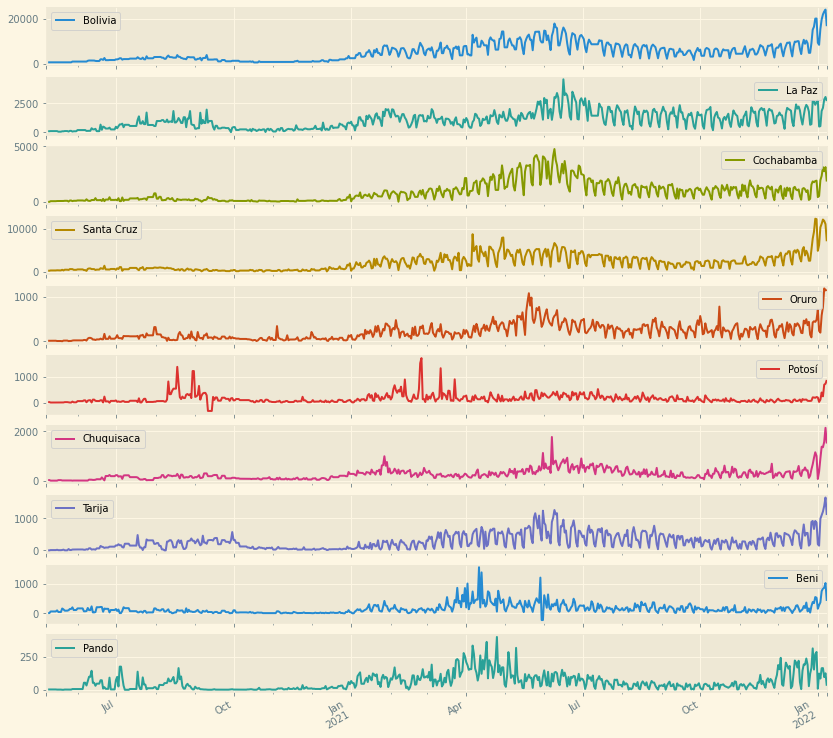

In [25]:
pruebas_diarias = pruebas_acum.diff()
pruebas_diarias.plot(subplots=True, figsize=(14,14),
                     # ylim=(-1000,0)
                    )
# plt.ylim(0,-1000)

pruebas_diarias = pruebas_diarias[pruebas_diarias.Bolivia>0]
pruebas_diarias.tail()

In [26]:
pruebas_diarias.to_csv(directory + "pruebas_diarias.csv")

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

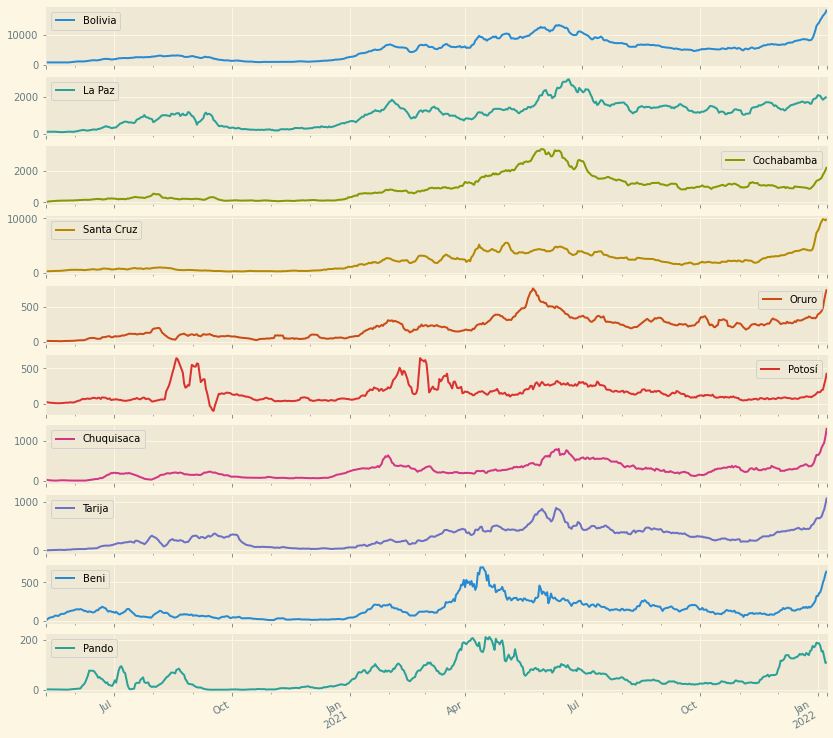

In [27]:
pruebas_diarias7 = pruebas_diarias.rolling(7,min_periods=1).mean()
pruebas_diarias7.plot(subplots=True, figsize=(14,14))

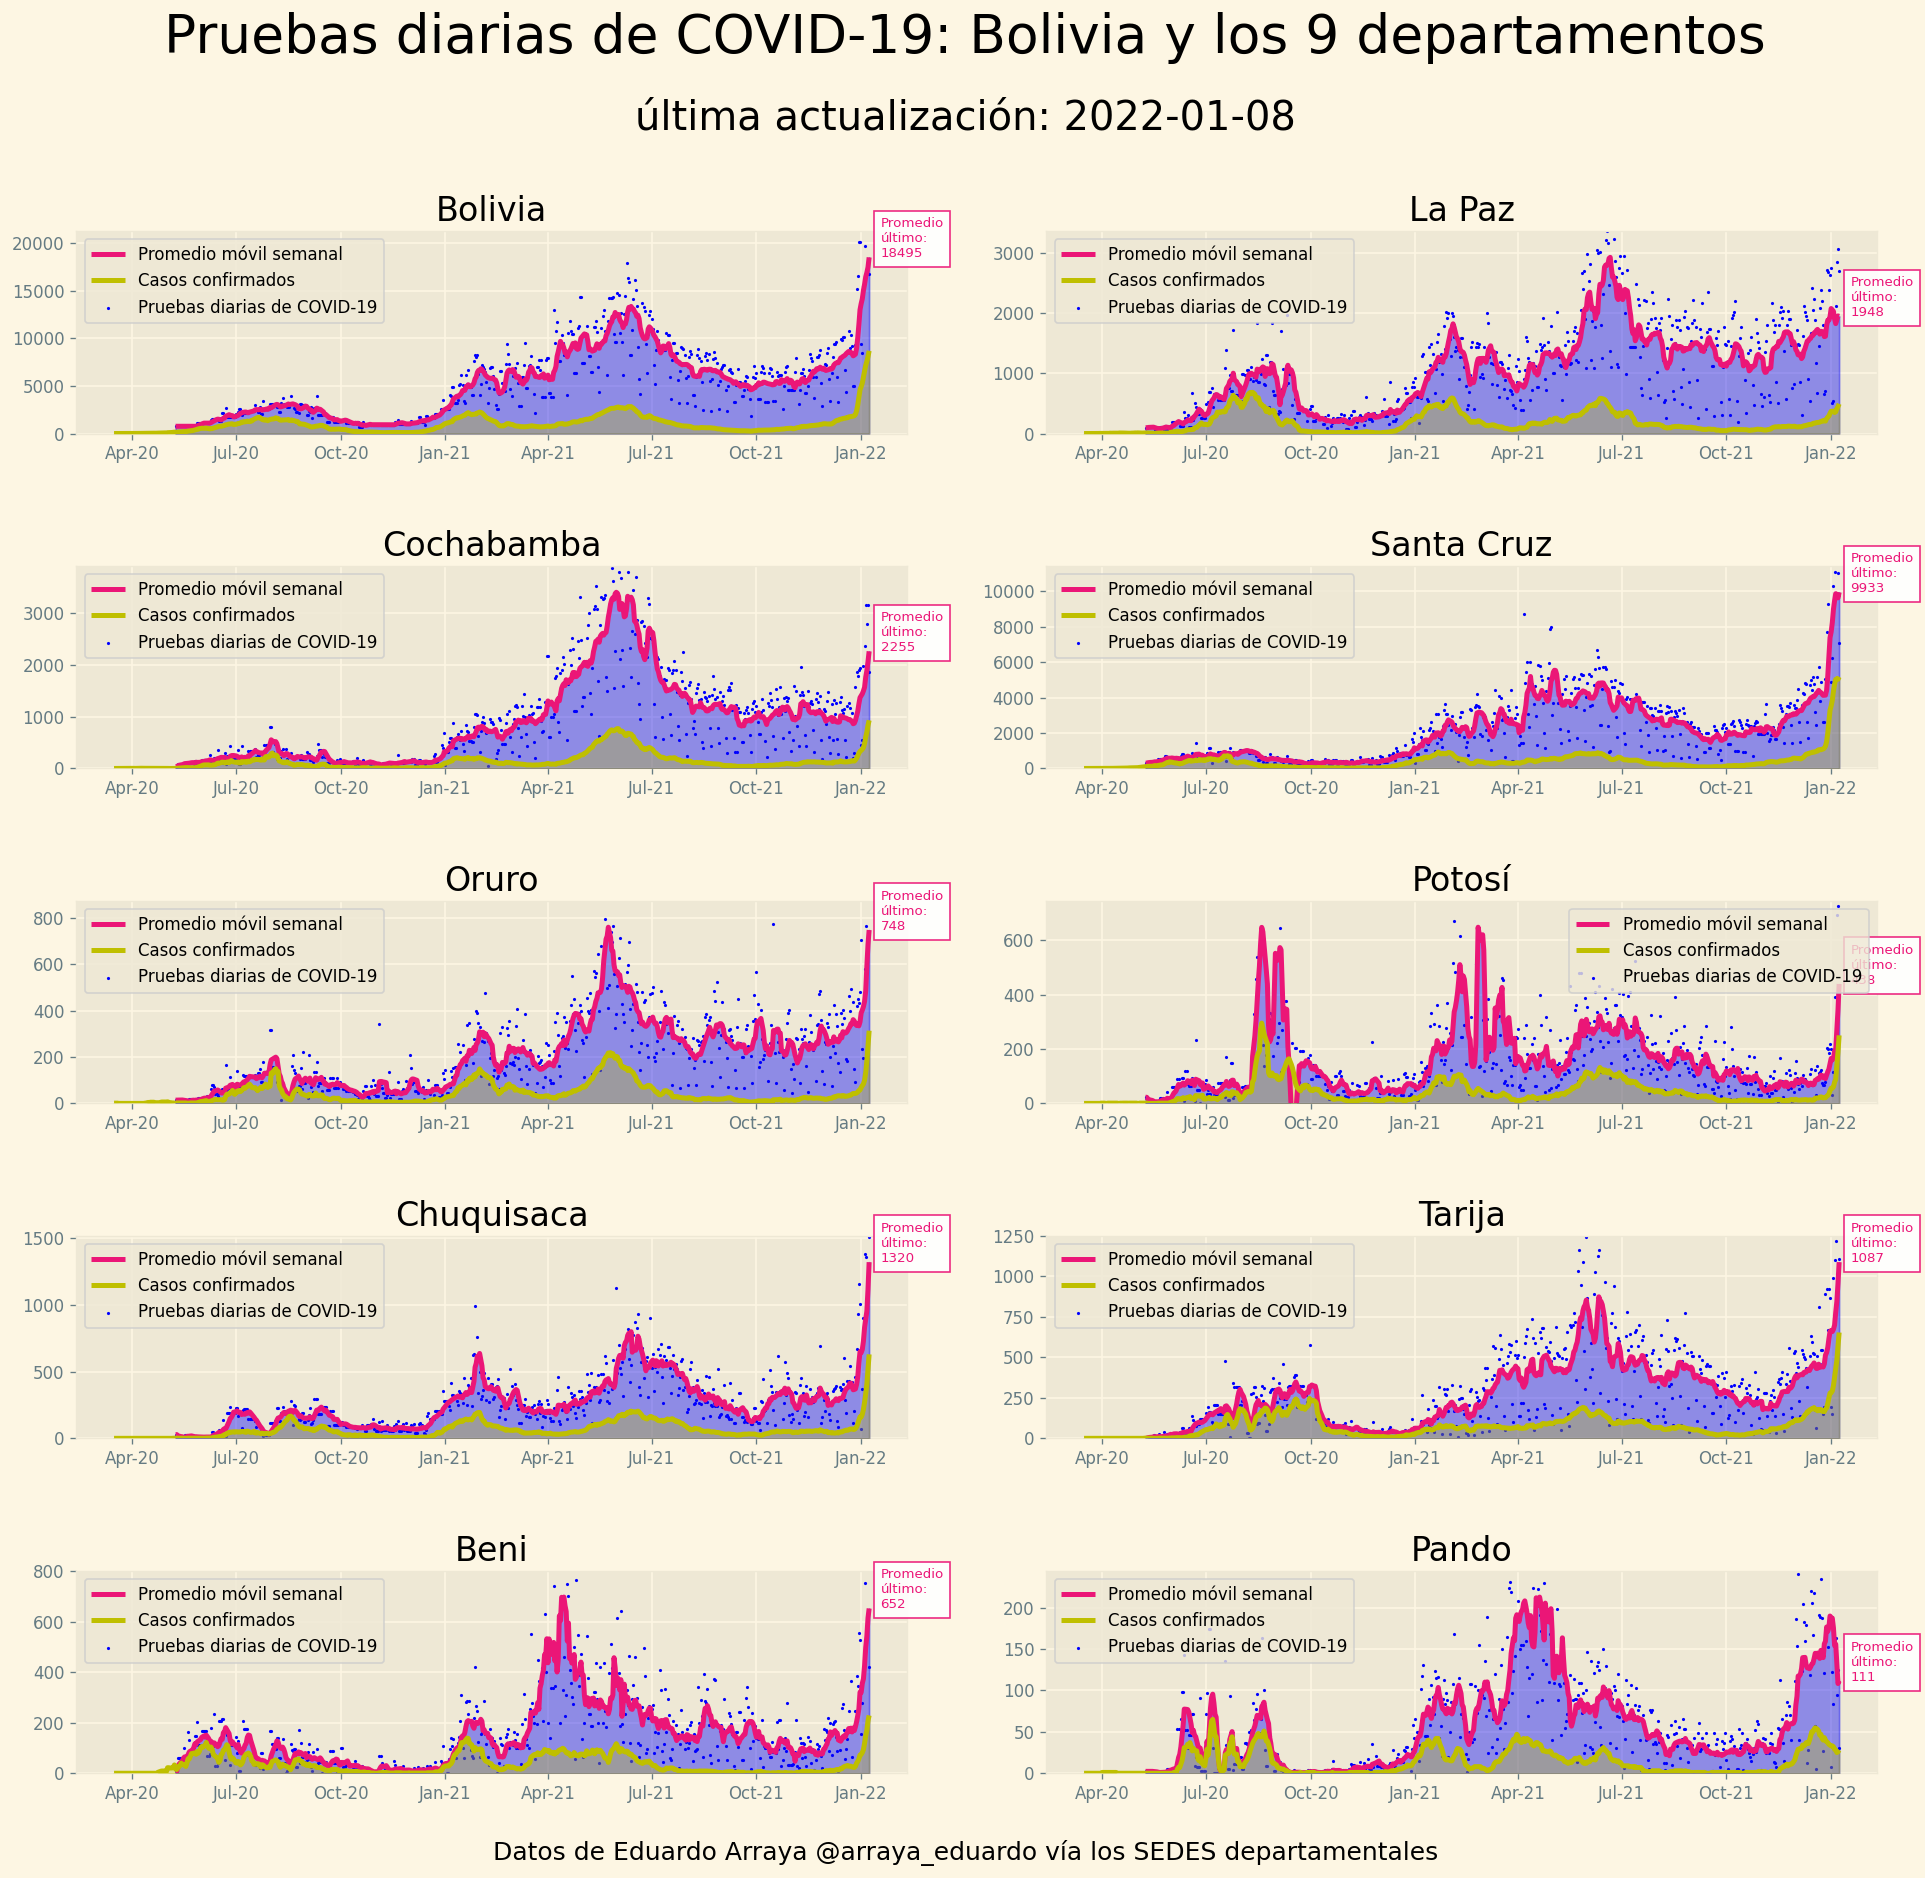

In [28]:
fig, axs = plt.subplots(5,2, figsize = (16,14), dpi=120)
axs = axs.flatten()

fig.suptitle("Pruebas diarias de COVID-19: Bolivia y los 9 departamentos", fontsize= 32, y=1.07)
fig.text(0.5,-.03,"Datos de Eduardo Arraya @arraya_eduardo vía los SEDES departamentales", fontsize=15, ha="center")
fig.text(0.5, 1.0,"última actualización: {}".format(pruebas_diarias.index[-1].date()), fontsize=24, ha="center")

for i in range(10):
    axs[i].grid(zorder=1)
    axs[i].set_title(pruebas_diarias.columns[i], fontsize = 20)
    # axs[i].bar(pruebas_diarias.index, pruebas_diarias[pruebas_diarias.columns[i]], color = "b", label="Pruebas diarias de COVID-19",width=.8,zorder=2)
    axs[i].scatter(pruebas_diarias.index, pruebas_diarias[pruebas_diarias.columns[i]], color = "b", label="Pruebas diarias de COVID-19",s=.8,zorder=2)
    axs[i].plot(pruebas_diarias.index, pruebas_diarias7[pruebas_diarias7.columns[i]], color = "#EB1677", label="Promedio móvil semanal", zorder=3, linewidth=3)
    axs[i].fill_between(pruebas_diarias.index, pruebas_diarias7[pruebas_diarias7.columns[i]], color = "b", zorder=3, alpha=.4)
    axs[i].plot(casos_diarios.index, casos_diarios7[casos_diarios7.columns[i]], color = "y", label="Casos confirmados", zorder=3, linewidth=3)
    axs[i].fill_between(casos_diarios.index, casos_diarios7[casos_diarios7.columns[i]], color = "y", zorder=3, alpha=.3)
    # axs[i].set_facecolor(background_color2)
    axs[i].set_ylim(0,pruebas_diarias7[pruebas_diarias7.columns[i]].max()*1.15)
    axs[i].legend()
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))

    axs[i].annotate( "Promedio\núltimo:\n" + str(pruebas_diarias7.iloc[-1,i].astype(int)),
      xy = (pruebas_diarias7.index[-1] + datetime.timedelta(days=10), pruebas_diarias7.iloc[-1,i]),
      fontsize=8,
      color = "#EB1677",
      bbox={
              'edgecolor': "#EB1677",
              'facecolor': 'w', 
              'alpha': .9}
          )


fig.tight_layout(pad=0.4, w_pad=2, h_pad=4)

fig.savefig(directory + "graficas/pruebas_diarias.jpg", bbox_inches="tight")

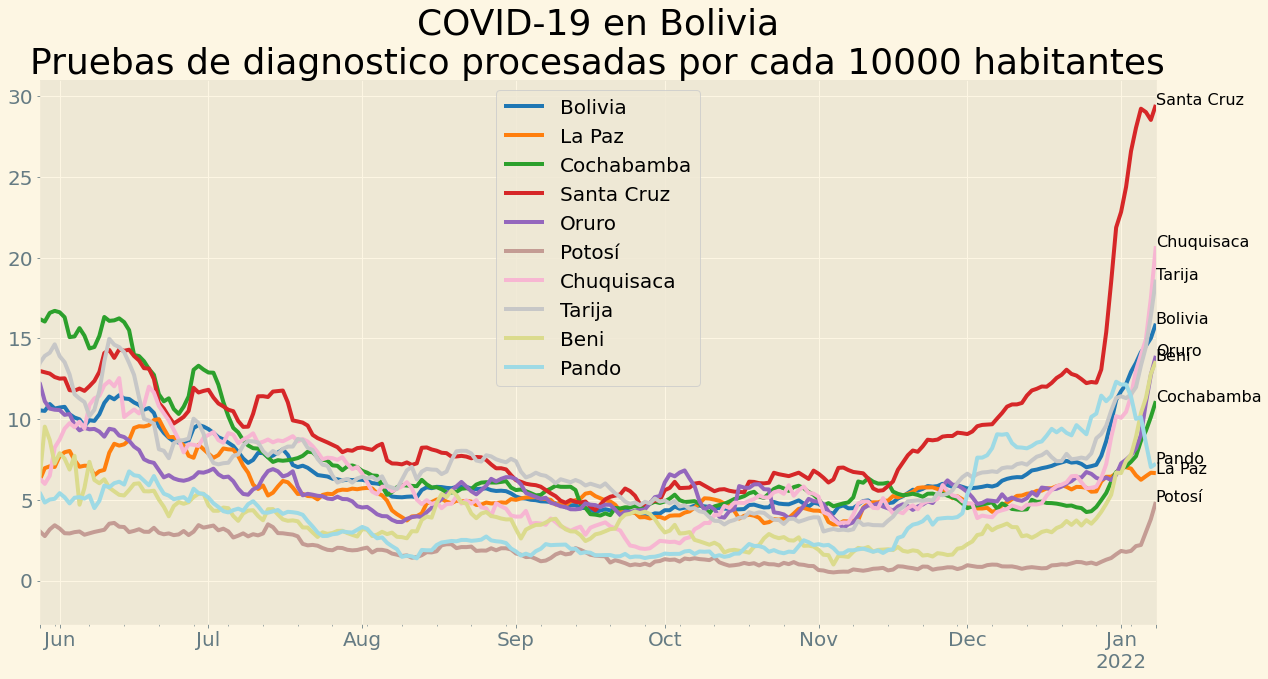

In [29]:
#pruebas7 per capita * 10000
pruebas_pc = pruebas_diarias7.div(habitantes.iloc[0,:], axis=1)*10000
pruebas_pc.plot(subplots=False, figsize=(20,10), linewidth=4, colormap="tab20")
plt.xlim("2021-05-28", pruebas_diarias7.index[-1])
plt.title('COVID-19 en Bolivia\nPruebas de diagnostico procesadas por cada 10000 habitantes', fontsize=36)

for i in range(len(pruebas_pc.columns)):
    plt.annotate(text = pruebas_pc.columns[i],
                xy = (pruebas_diarias7.index[-1], pruebas_pc.iloc[-1,i]), fontsize=16)
plt.legend(fontsize=20)
plt.tick_params(axis='both', labelsize=20)


# Positividad
Positividad = (confirmados)/(pruebas procesadas)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

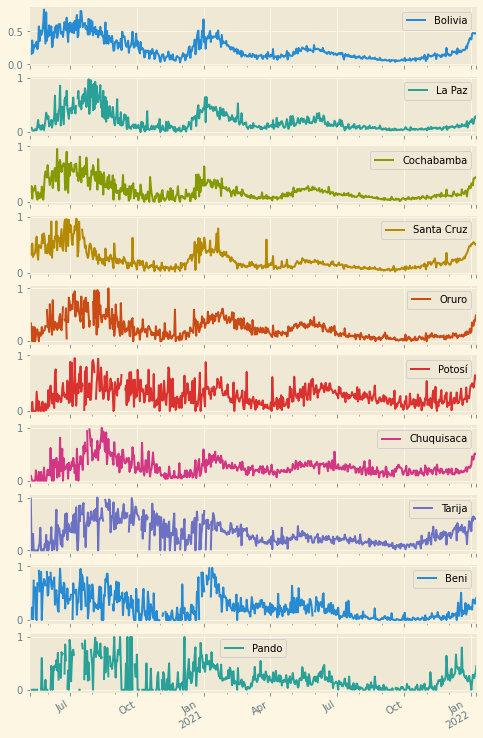

In [30]:
positividad_diaria_raw = casos_diarios / pruebas_diarias#.rolling(5).mean()


positividad_diaria_raw[positividad_diaria_raw>1] = np.nan
positividad_diaria_raw[positividad_diaria_raw<0] = np.nan


# positividad_diaria_raw = casos_diarios / pruebas_diarias#.rolling(5).mean()

positividad_diaria_raw = positividad_diaria_raw.drop(positividad_diaria_raw.index[0:59])

positividad_diaria_raw.to_csv(directory + "positividad_diaria_raw.csv")

positividad_diaria_raw.plot(subplots=True, figsize=(8,14))


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

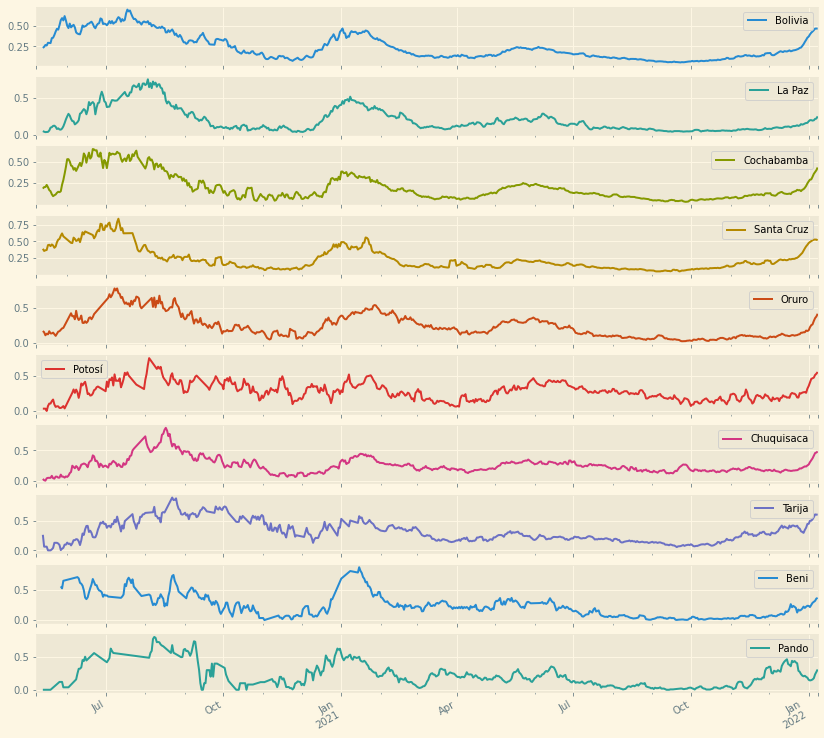

In [31]:
positividad_diaria_adj = positividad_diaria_raw.rolling(5).mean() #,min_periods=1

positividad_diaria_adj = positividad_diaria_adj.interpolate()

positividad_diaria_adj.to_csv(directory + "positividad_diaria_ajuste.csv")

positividad_diaria_adj.plot(subplots=True, figsize=(14,14))

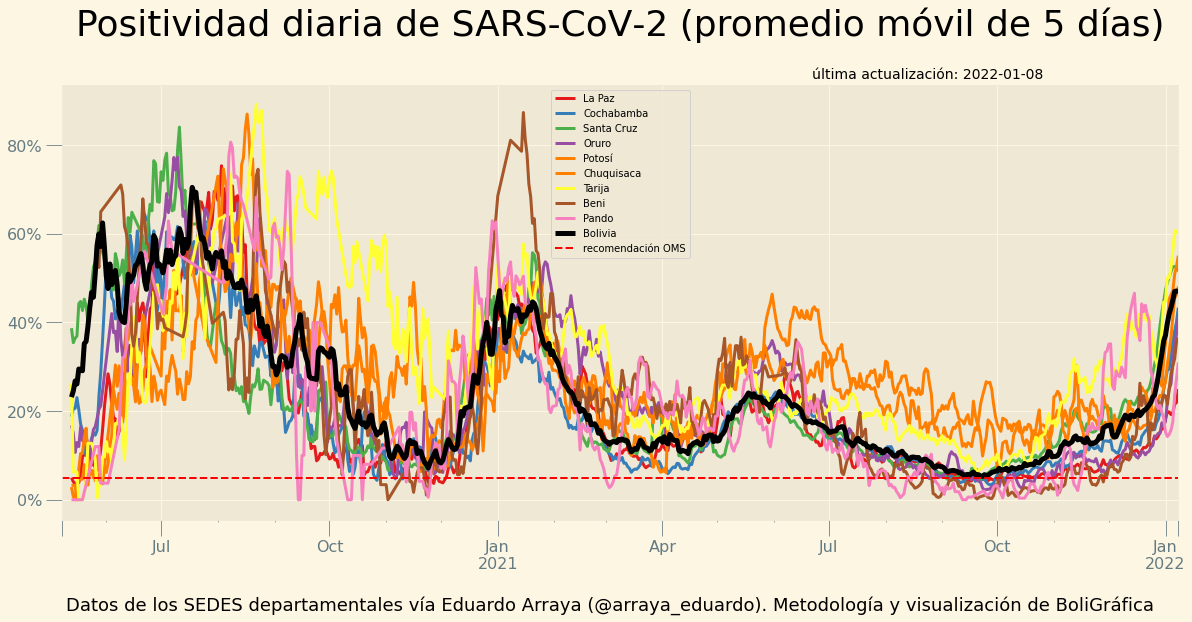

In [32]:
ax = positividad_diaria_adj.iloc[:,1:].plot(figsize = (20,8),zorder=2, linewidth=3, color= cm.get_cmap("Set1",12)(range(1,12)))
plt.plot(positividad_diaria_adj.index, positividad_diaria_adj.Bolivia, color="black", linewidth=5, label="Bolivia")

plt.grid(zorder=1)
plt.title("Positividad diaria de SARS‑CoV‑2 (promedio móvil de 5 días)", fontsize =36, y=1.1)

plt.text(18392,-.25,"Datos de los SEDES departamentales vía Eduardo Arraya (@arraya_eduardo). Metodología y visualización de BoliGráfica", fontsize=18)
plt.text(18800, .95,"última actualización: {}".format(pruebas_diarias.index[-1].date()), fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

ax.tick_params(size=16)
ax.axhline(y = .05, color="r", linestyle="dashed", label= "recomendación OMS")
ax.legend()
plt.savefig(directory + "graficas/positividad_diaria_todos.jpg", bbox_inches="tight", dpi=120)

/opt/hostedtoolcache/Python/3.9.9/x64/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/opt/hostedtoolcache/Python/3.9.9/x64/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


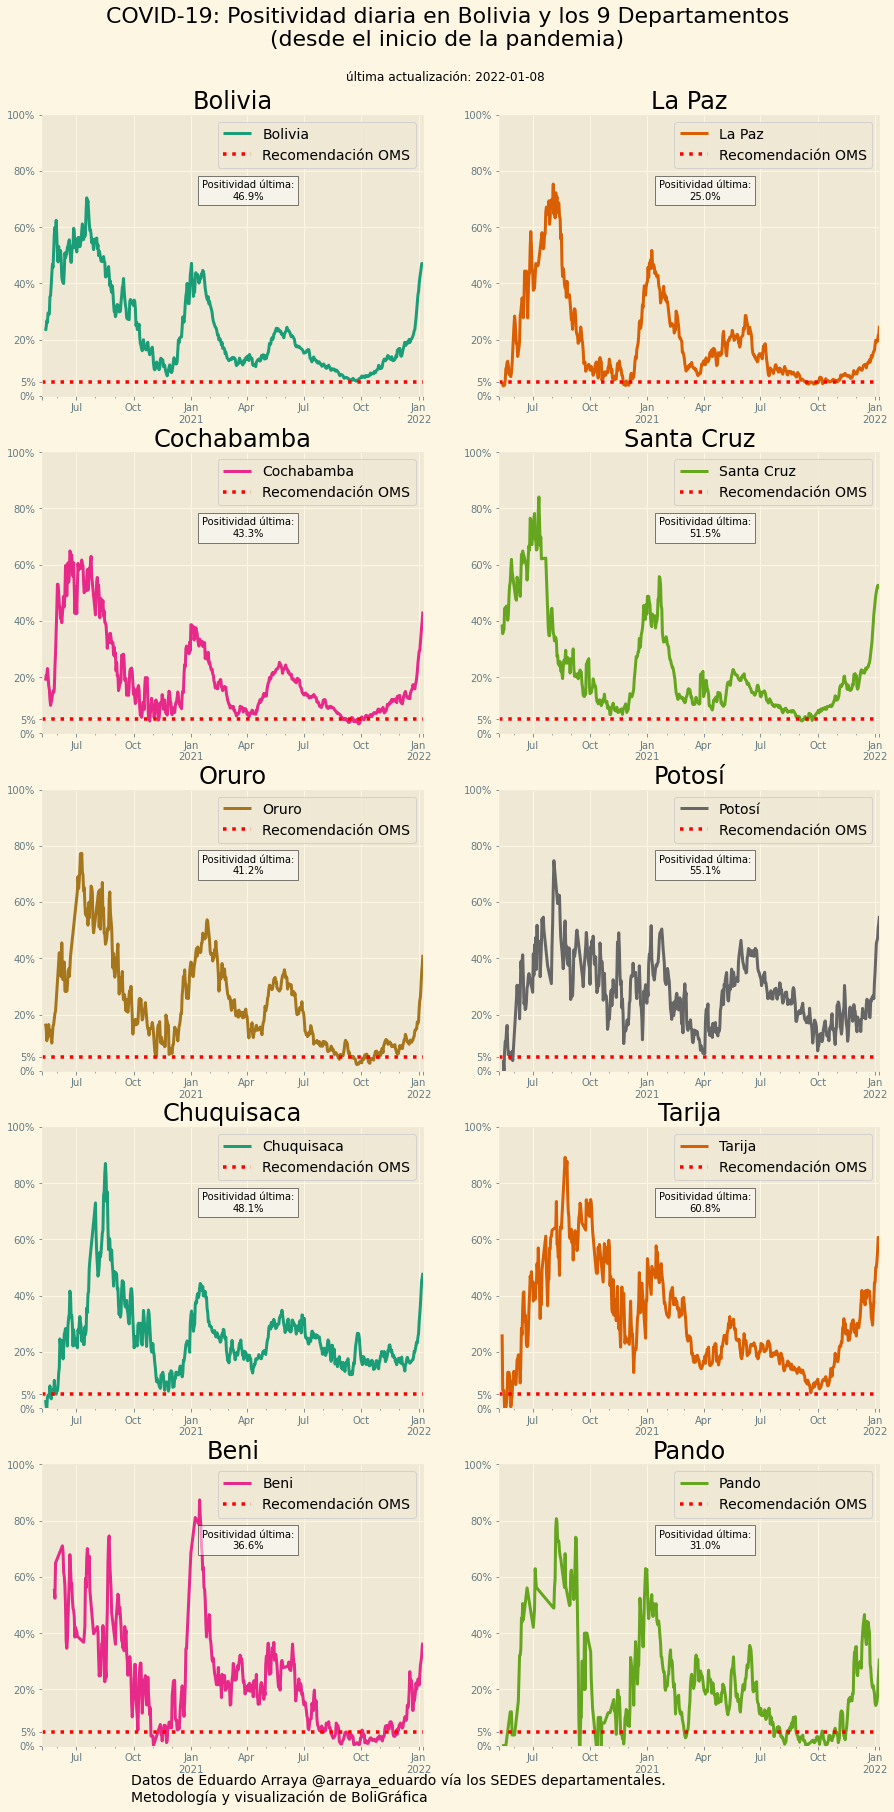

In [33]:
axs = positividad_diaria_adj.interpolate().plot(subplots=True, layout=(5,2), sharey=False, sharex=False, figsize = (15,30), linewidth = 3, 
                                                color=cm.get_cmap("Dark2",6)(range(6)))

axs[0][0].get_figure().suptitle('COVID-19: Positividad diaria en Bolivia y los 9 Departamentos\n(desde el inicio de la pandemia)', y=.93, fontsize = 22)
axs = axs.flatten()

for i in range(10):
    axs[i].set_title(positividad_diaria_adj.columns[i], fontsize = 24)
    axs[i].set_ylim(0,1)
    axs[i].set_yticks((0,0.05,.2,.4,.6,.8,1))
    axs[i].axhline(y=0.05, color='r', linestyle='dotted',label="Recomendación OMS", linewidth=3.5)
    axs[i].legend(fontsize = 14)
    axs[i].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))
    axs[i].text(18720,.7, "Positividad última:\n{}%".format((positividad_diaria_adj.iloc[-1,i]*100).round(1)), ha="center",
              bbox={
              'edgecolor': "black",
              'facecolor': 'w', 
              'alpha': .5}
          )


plt.text(17800, -.2,"Datos de Eduardo Arraya @arraya_eduardo vía los SEDES departamentales.\nMetodología y visualización de BoliGráfica", fontsize=14)
plt.text(18145, 5.92,"última actualización: {}".format(pruebas_diarias.index[-1].date()), fontsize=12)
plt.savefig(directory + "graficas/positividad_diaria_subplots.jpg", bbox_inches="tight", dpi=120)

/opt/hostedtoolcache/Python/3.9.9/x64/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


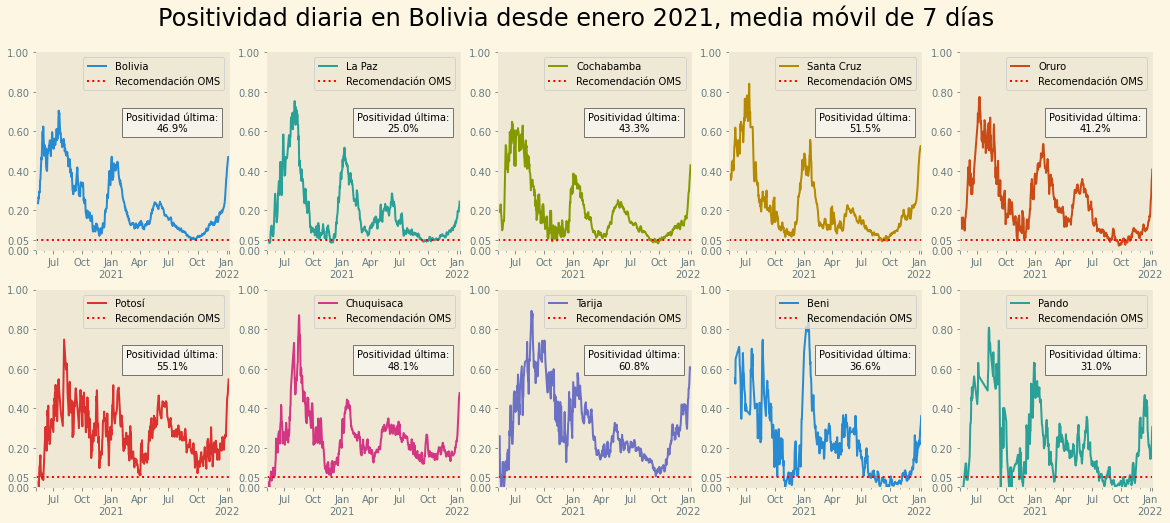

In [34]:
#starts 2021

axs = positividad_diaria_adj.interpolate().plot(subplots=True, layout=(2,5), sharey=False, sharex=False, figsize = (20,8))

axs[0][0].get_figure().suptitle('Positividad diaria en Bolivia desde enero 2021, media móvil de 7 días', y=.96, fontsize = 24)
axs = axs.flatten()

for i in range(10):
    axs[i].grid()
    axs[i].set_ylim(0,1)
    axs[i].set_yticks((0,0.05,.2,.4,.6,.8,1))
    axs[i].axhline(y=0.05, color='r', linestyle='dotted',label="Recomendación OMS")
    axs[i].legend()
    # axs[i].set_xlim("2021-01-01", positividad_diaria_adj.index[-1])
    axs[i].text(18820,.6, "Positividad última:\n{}%".format((positividad_diaria_adj.iloc[-1,i]*100).round(1)), ha="center",
              bbox={
              'edgecolor': "black",
              'facecolor': 'w', 
              'alpha': .5}
          )

plt.savefig(directory + "positividad_2021.jpg", bbox_inches="tight")

# MIX

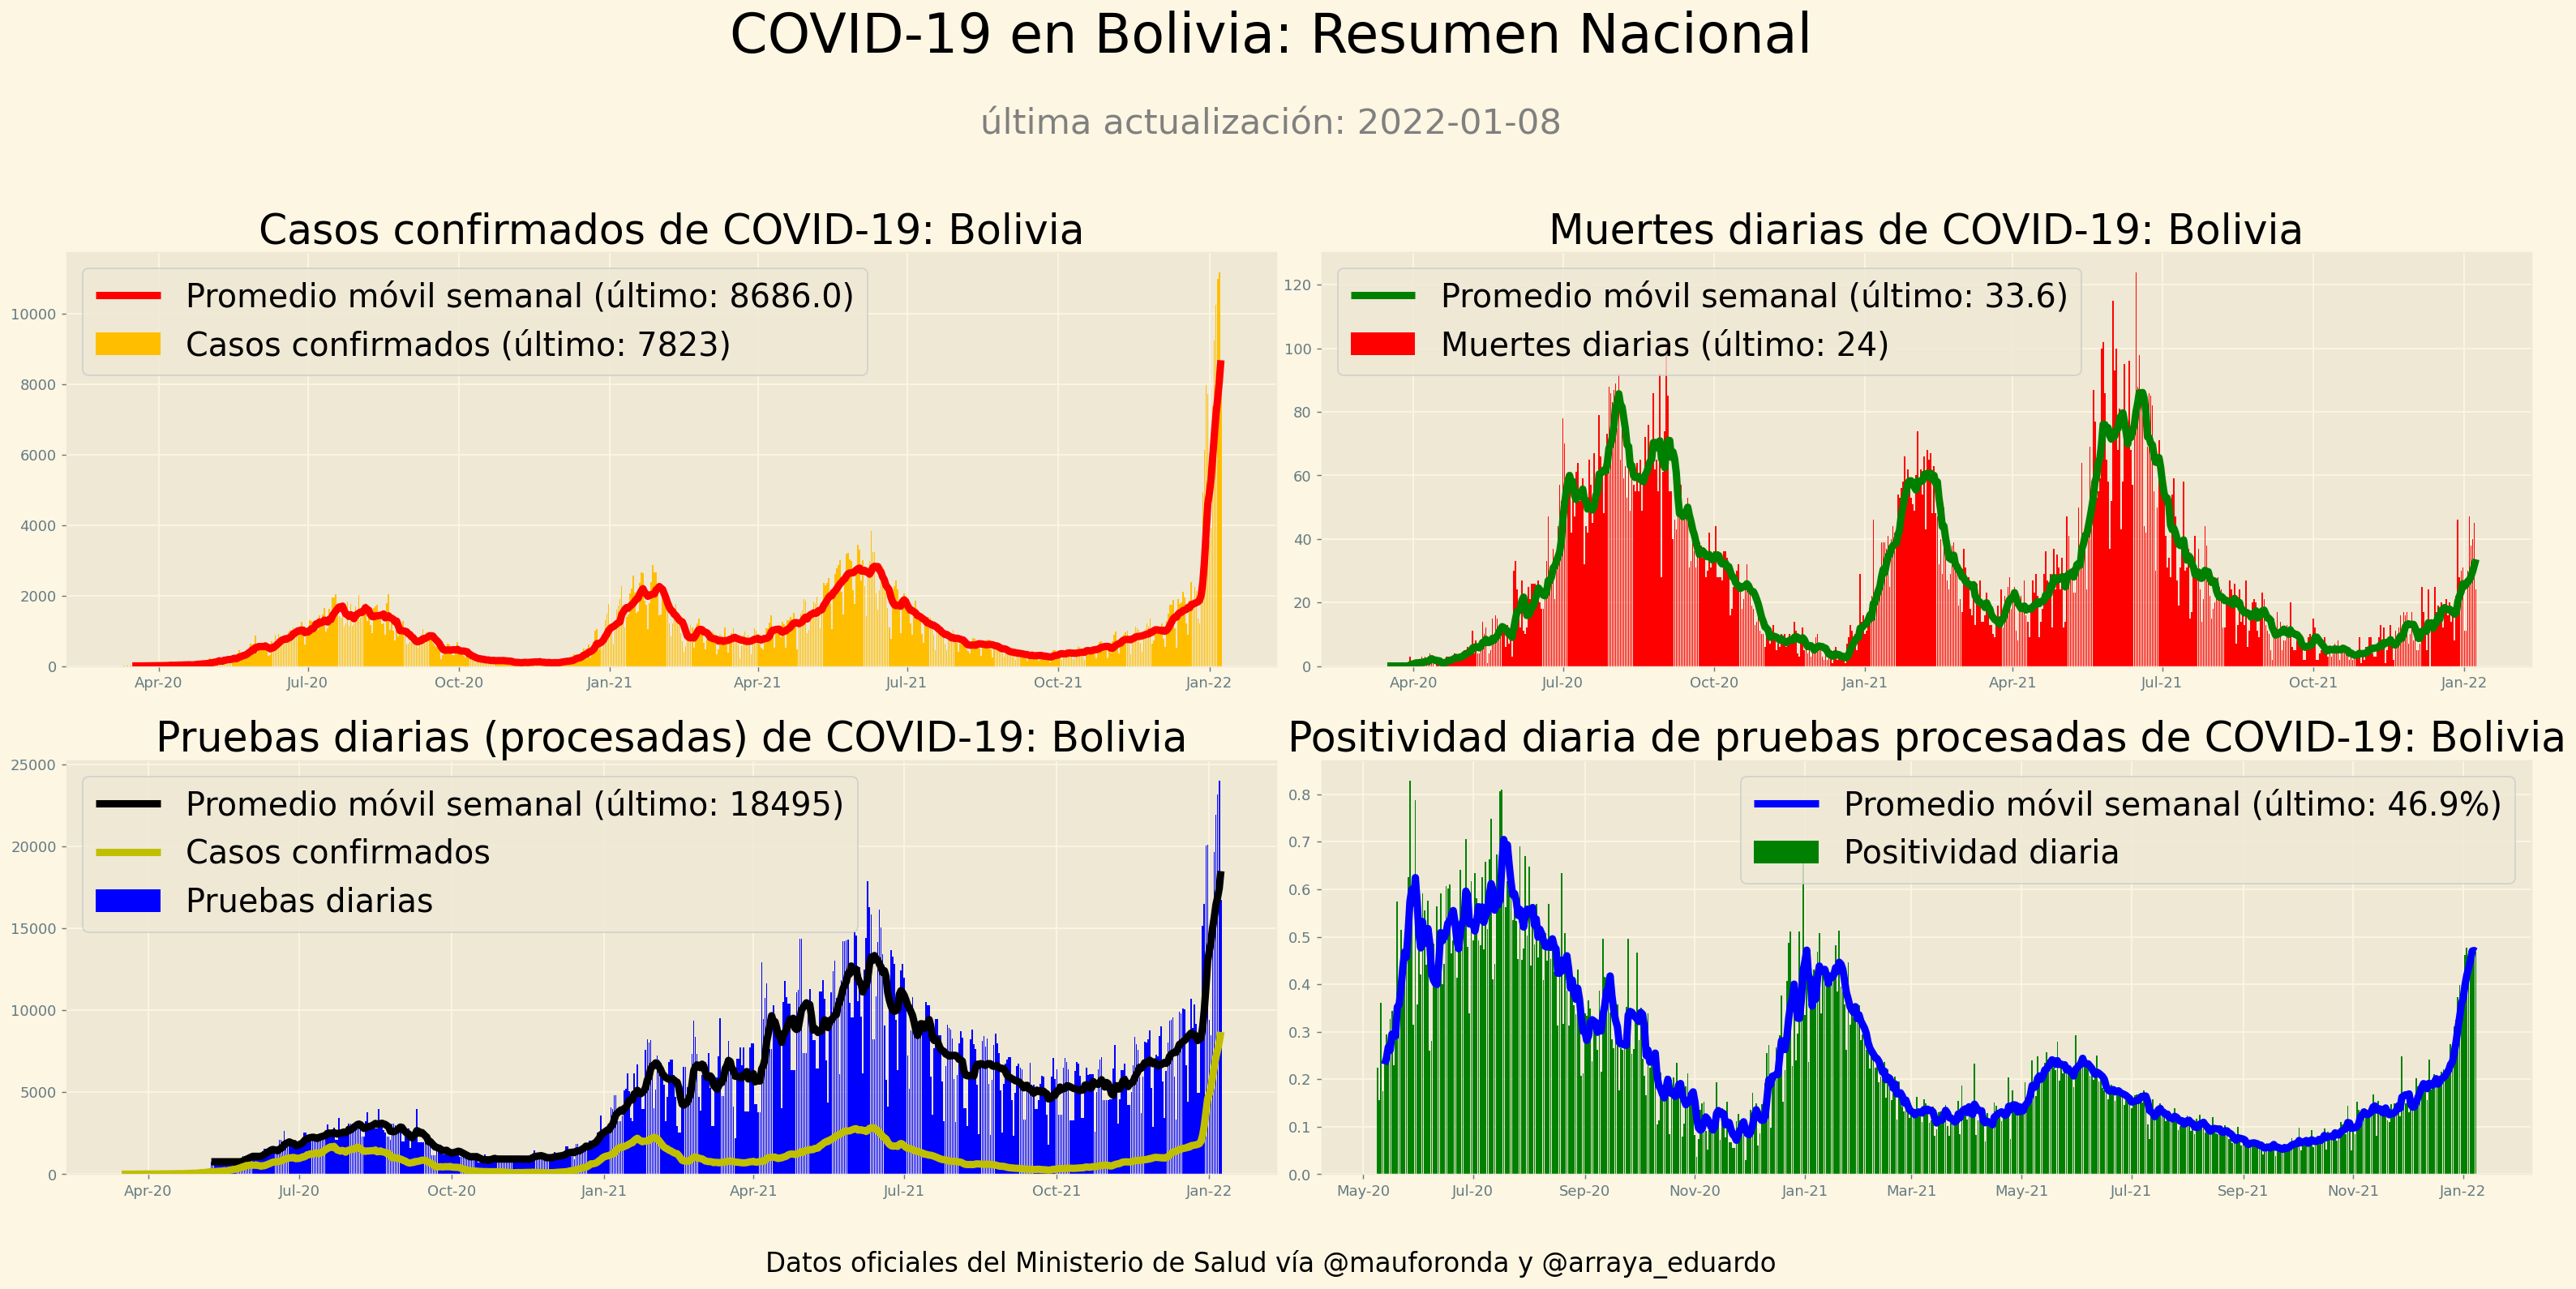

In [35]:
fig, axs = plt.subplots(2,2, figsize = (24,10), dpi=130)
axs = axs.flatten()

fig.suptitle("COVID-19 en Bolivia: Resumen Nacional", fontsize= 37, y=1.132)
fig.text(0.5,-.065,"Datos oficiales del Ministerio de Salud vía @mauforonda y @arraya_eduardo", fontsize=18, ha="center")
fig.text(.5, 1.015,"última actualización: {}".format(muertes_diarias.index[-1].date()), fontsize=24, ha="center", color="gray")

axs[0].grid(zorder=3)
axs[0].set_title("Casos confirmados de COVID-19: Bolivia", fontsize=28) 
axs[0].bar(casos_diarios.index, casos_diarios.Bolivia, color = "#ffbf00", label="Casos confirmados (último: {})".format(casos_diarios.Bolivia.iloc[-1].astype(int)),width=.8,zorder=2)
axs[0].plot(casos_diarios.index, casos_diarios7.Bolivia, color = "r", label="Promedio móvil semanal (último: {})".format(casos_diarios7.Bolivia.iloc[-1]), zorder=3, linewidth=5)
#axs[0].set_ylim(0,casos_diarios7[casos_diarios7.columns[i]].max()*1.15)
axs[0].legend(fontsize=22)
axs[0].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))

axs[1].grid(zorder=3)
axs[1].set_title("Muertes diarias de COVID-19: Bolivia", fontsize=28) 
axs[1].bar(muertes_diarias.index, muertes_diarias.Bolivia, color = "r", label="Muertes diarias (último: {})".format(muertes_diarias.Bolivia.iloc[-1]),width=.8,zorder=2)
axs[1].plot(muertes_diarias.index, muertes_diarias7.Bolivia, color = "g", label="Promedio móvil semanal (último: {})".format(muertes_diarias7.Bolivia.iloc[-1]), zorder=3, linewidth=5)
#axs[1].set_ylim(0,muertes_diarias7[muertes_diarias7.columns[i]].max()*1.15)
axs[1].legend(fontsize=22)
axs[1].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))

axs[2].grid(zorder=3)
axs[2].set_title("Pruebas diarias (procesadas) de COVID-19: Bolivia", fontsize=28) 
axs[2].bar(pruebas_diarias.index, pruebas_diarias.Bolivia, color = "b", label="Pruebas diarias", width=.8,zorder=2)
axs[2].plot(pruebas_diarias.index, pruebas_diarias7.Bolivia, color = "black", label="Promedio móvil semanal (último: {})".format(pruebas_diarias7.Bolivia.iloc[-1].astype(int)), zorder=3, linewidth=5)
#axs[2].set_ylim(0,pruebas_diarias7[pruebas_diarias7.columns[i]].max()*1.15)
axs[2].plot(casos_diarios.index, casos_diarios7.Bolivia, color = "y", label="Casos confirmados".format(casos_diarios7.Bolivia.iloc[-1]), zorder=3, linewidth=5)

axs[2].legend(fontsize=22)
axs[2].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))


axs[3].grid(zorder=3)
axs[3].set_title("Positividad diaria de pruebas procesadas de COVID-19: Bolivia", fontsize=28) 
axs[3].bar(positividad_diaria_raw.index, positividad_diaria_raw.Bolivia, color = "g", label="Positividad diaria",width=.8,zorder=2)
axs[3].plot(positividad_diaria_raw.index, positividad_diaria_adj.Bolivia, color = "b", label="Promedio móvil semanal (último: {}%)".format((positividad_diaria_adj.Bolivia.iloc[-1]*100).round(1)), zorder=3, linewidth=5)
#axs[3].set_ylim(0,positividad_diaria_adj[positividad_diaria_adj.olumns[i]].max()*1.15)
axs[3].legend(fontsize=22)
axs[3].xaxis.set_major_formatter(mdates.DateFormatter("%b-%y"))

fig.tight_layout(pad=0.3, w_pad=0.5, h_pad=2)

fig.savefig(directory + "graficas/resumen_nacional.jpg", bbox_inches="tight")

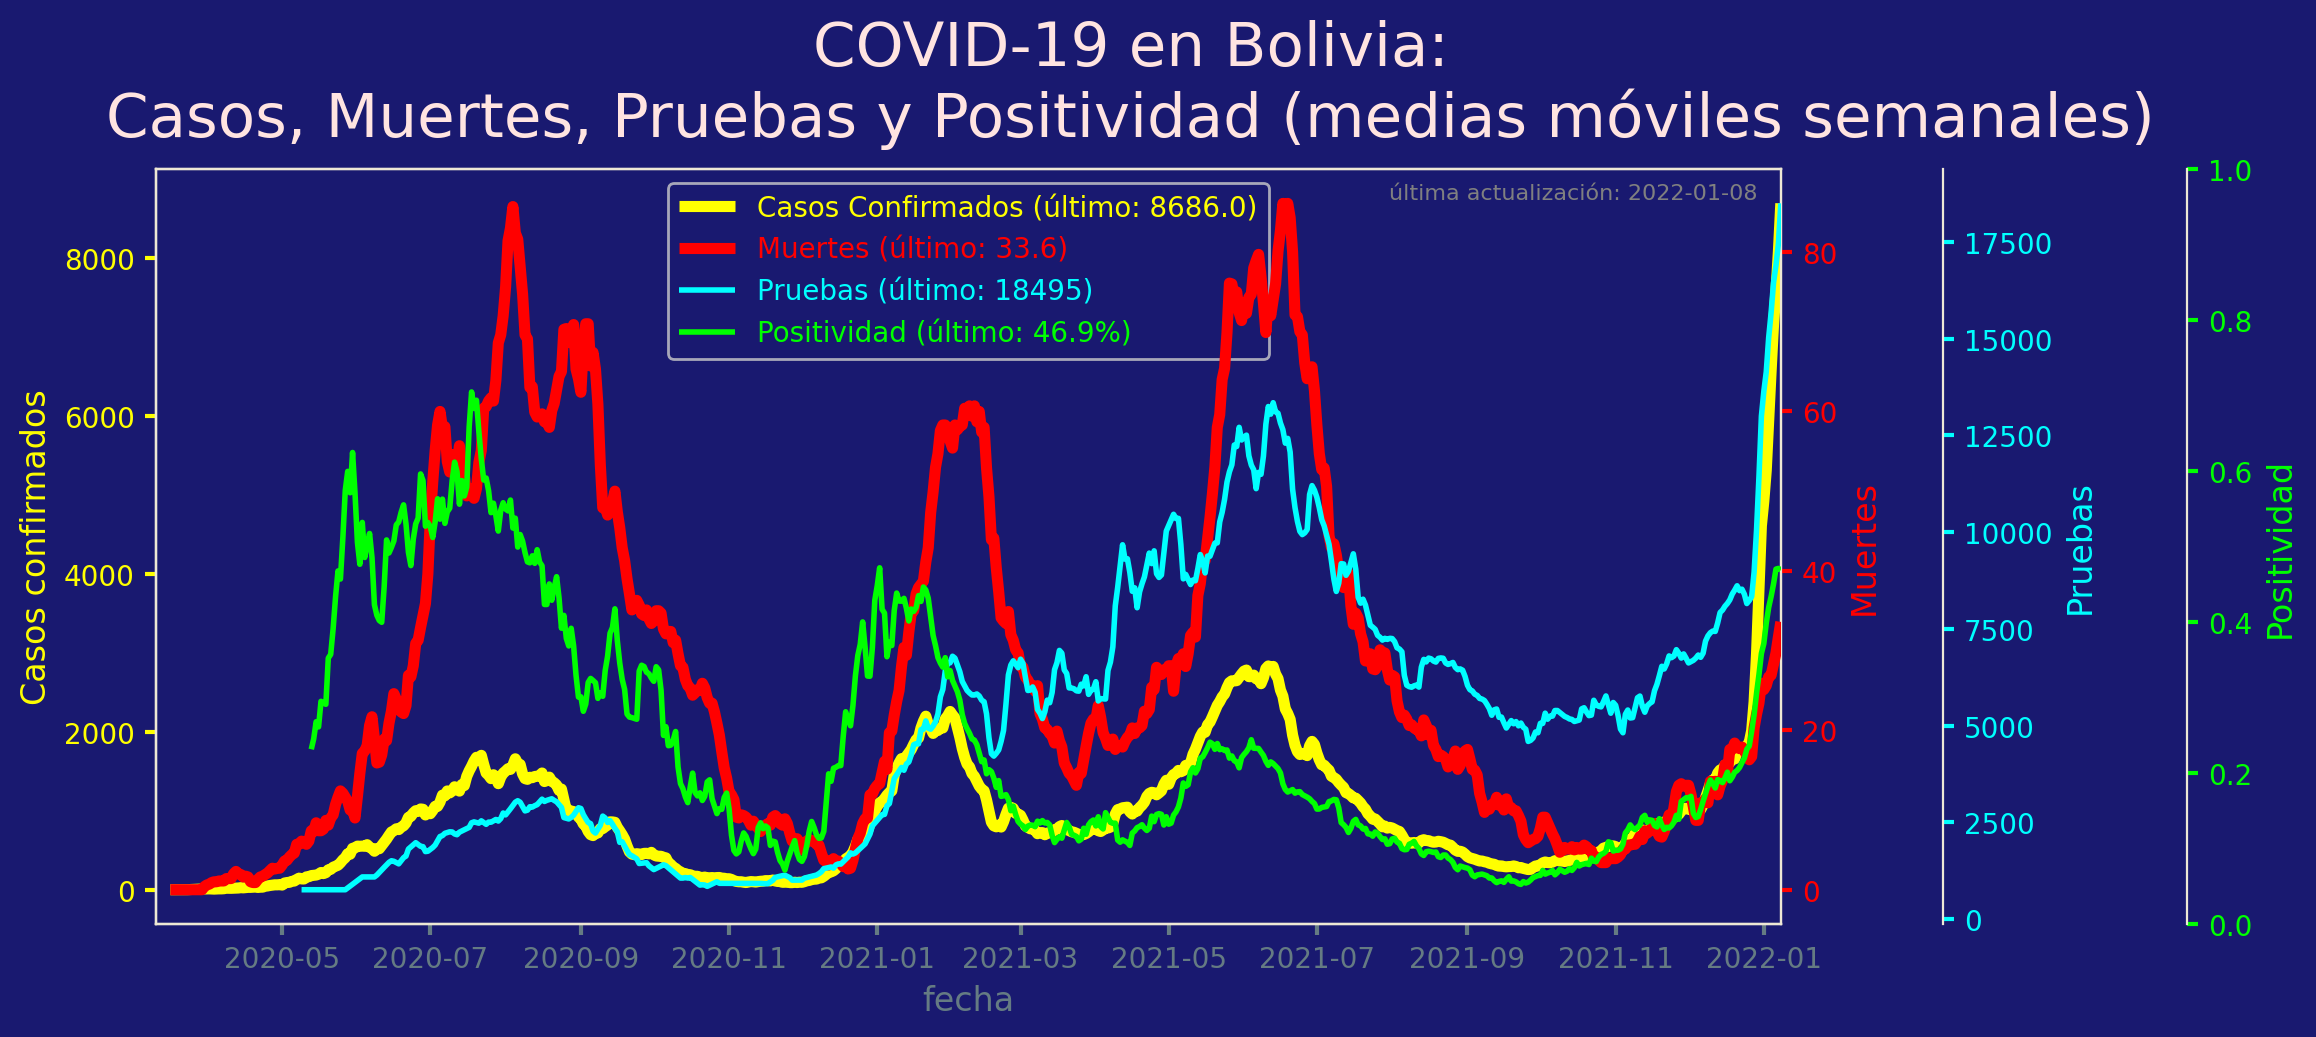

In [36]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots(figsize=(13,5), dpi=200)
fig.suptitle("COVID-19 en Bolivia:\nCasos, Muertes, Pruebas y Positividad (medias móviles semanales)", fontsize=22,y=1.03, color="mistyrose")
fig.text(.67, .85,"última actualización: {}".format(muertes_diarias.index[-1].date()), fontsize=8, ha="center", color="gray")
fig.subplots_adjust(right=0.75)
fig.set_facecolor("midnightblue")
host.set_facecolor("midnightblue")

host=host
par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()


# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.1))
par3.spines["right"].set_position(("axes", 1.25))

# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)

# Show the right spine.
par2.spines["right"].set_visible(True)
par3.spines["right"].set_visible(True)

#plot lines in their own axs
p1, = host.plot(casos_diarios.index, casos_diarios7.Bolivia, color = "yellow", label="Casos Confirmados (último: {})".format(casos_diarios7.Bolivia.iloc[-1]), zorder=3, linewidth=4)
p2, = par1.plot(muertes_diarias.index, muertes_diarias7.Bolivia, color = "r", label="Muertes (último: {})".format(muertes_diarias7.Bolivia.iloc[-1]), zorder=3, linewidth=4)
p3, = par2.plot(pruebas_diarias.index, pruebas_diarias7.Bolivia, color = "cyan", label="Pruebas (último: {})".format(pruebas_diarias7.Bolivia.iloc[-1].astype(int)), zorder=3, linewidth=2)
p4, = par3.plot(positividad_diaria_raw.index, positividad_diaria_adj.Bolivia, color = "lime", label="Positividad (último: {}%)".format((positividad_diaria_adj.Bolivia.iloc[-1]*100).round(1)), zorder=3, linewidth=2)


#x and y lims
host.set_xlim(casos_diarios.index[0], casos_diarios.index[-1])
# host.set_ylim(0, 3000)
# par1.set_ylim(0, 100)
# par2.set_ylim(1, 13000)
par3.set_ylim(0,1)

host.set_xlabel("fecha")
host.set_ylabel("Casos confirmados")
par1.set_ylabel("Muertes")
par2.set_ylabel("Pruebas")
par3.set_ylabel("Positividad")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
par3.yaxis.label.set_color(p4.get_color())


tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
par3.tick_params(axis='y', colors=p4.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

host.grid(False)
par1.grid(False)
par2.grid(False)
par3.grid(False)

lines = [p1, p2, p3, p4]
host.legend(lines, [l.get_label() for l in lines], facecolor="midnightblue", labelcolor="linecolor", loc="upper center")

plt.show()
fig.savefig("graficas/resumen_nacional_normalizado.jpg", bbox_inches="tight")

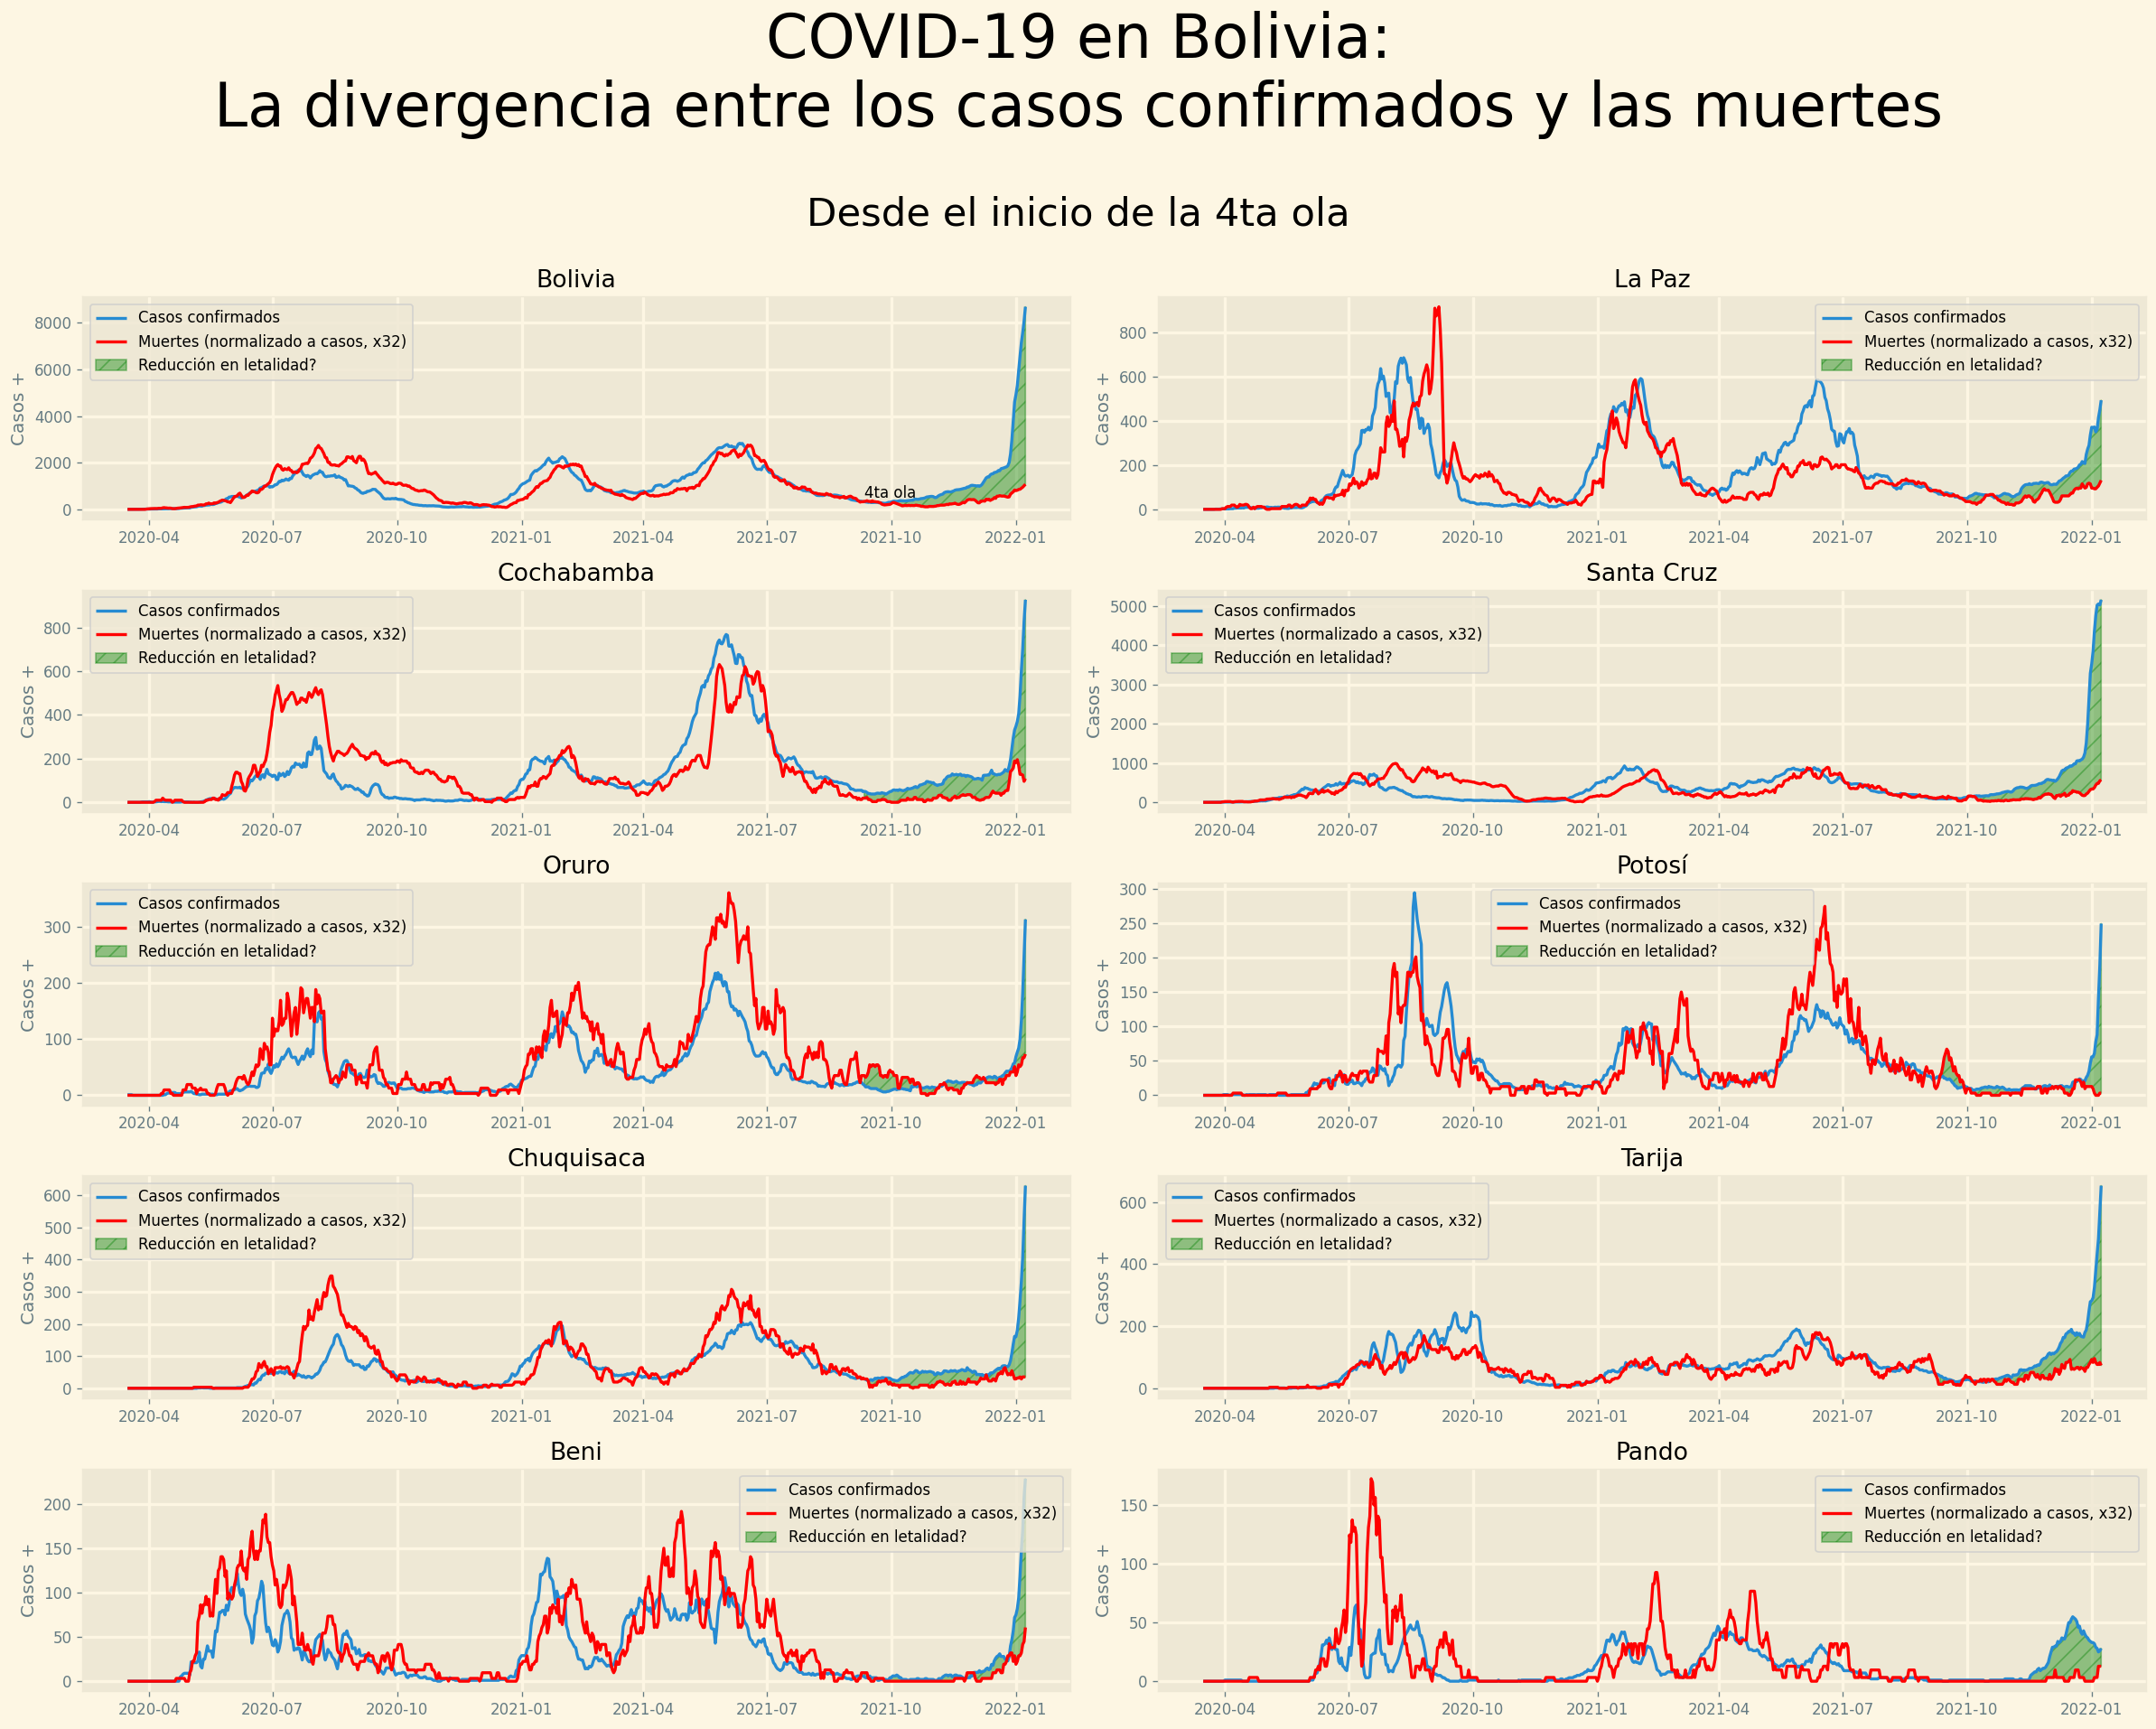

In [37]:
fig, axes = plt.subplots(5,2,figsize=(20,15), dpi=120)
axs = axes.flatten()

fig.suptitle("COVID-19 en Bolivia:\nLa divergencia entre los casos confirmados y las muertes", fontsize=40,y=1.06)
fig.text(s="Desde el inicio de la 4ta ola", fontsize=26,y=.928, x=.5, ha="center")

multiplier = 32
start_date = 550

for i, ax in enumerate(axs):
        axs[i].set_title(casos_diarios7.columns[i])
        axs[i].plot(casos_diarios7.index, casos_diarios7[casos_diarios7.columns[i]], label="Casos confirmados")
        axs[i].plot(muertes_diarias7.index, muertes_diarias7[muertes_diarias7.columns[i]] * multiplier, color="r", label="Muertes (normalizado a casos, x32)")
        axs[i].fill_between(casos_diarios7.index[start_date:], casos_diarios7[casos_diarios7.columns[i]][start_date:], muertes_diarias7[muertes_diarias7.columns[i]][start_date:]*multiplier,
                            color="g", alpha=.4, hatch="//", label="Reducción en letalidad?")
        # axs[i].axis("off")
        axs[i].grid("both", linewidth=2)
        axs[i].set_ylabel("Casos +")
        # create a twin of the axis that shares the x-axis
        # print(i,ax)
        # ax2 = axs[i].twinx()
        # ax2.grid(None)
        # ax2.plot(casos_diarios7.index, casos_diarios7[casos_diarios7.columns[i]], linewidth=1)
        # ax2.plot(muertes_diarias7.index, muertes_diarias7[muertes_diarias7.columns[i]]*multiplier, color="m")
        # # ax2.set_yticks(axs[i].get_yticks())
        # # ax2.set_ylim(bottom=0)
        # ax2.set_yticklabels((ax2.get_yticks()/multiplier).round(0))
        axs[i].legend()

axs[0].annotate(text = "4ta ola", xy=(casos_diarios7.index[start_date], 500))
fig.tight_layout()
fig.savefig("graficas/casos_muertes_normalizado_dept.jpg", bbox_inches="tight")

# ACTIVOS


In [38]:
activos = casos_diarios.rolling(14).sum()      #-muertes_diarias.rolling(14).sum()
activos.index = pd.to_datetime(activos.index)

activos.to_csv(directory + "activos.csv")
activos

Bolivia  La Paz  Cochabamba  Santa Cruz   Oruro  Potosí  \
2020-03-10      NaN     NaN         NaN         NaN     NaN     NaN   
2020-03-11      NaN     NaN         NaN         NaN     NaN     NaN   
2020-03-12      NaN     NaN         NaN         NaN     NaN     NaN   
2020-03-13      NaN     NaN         NaN         NaN     NaN     NaN   
2020-03-14      NaN     NaN         NaN         NaN     NaN     NaN   
...             ...     ...         ...         ...     ...     ...   
2022-01-04  62587.0  4183.0      4772.0     43833.0  1018.0   723.0   
2022-01-05  70941.0  4431.0      5930.0     49051.0  1274.0   820.0   
2022-01-06  79701.0  4919.0      6974.0     53953.0  1675.0  1240.0   
2022-01-07  88762.0  5495.0      8117.0     58226.0  2151.0  1650.0   
2022-01-08  95230.0  6045.0      8929.0     60800.0  2685.0  2143.0   

            Chuquisaca  Tarija    Beni  Pando  
2020-03-10         NaN     NaN     NaN    NaN  
2020-03-11         NaN     NaN     NaN    NaN  
2020-03-12         NaN     NaN     NaN    NaN  
2020-03-13         NaN     NaN     NaN    NaN  
2020-03-14         NaN     NaN     NaN    NaN  
...                ...     ...     ...    ...  
2022-01-04      2504.0  3969.0  1114.0  471.0  
2022-01-05      3083.0  4528.0  1368.0  456.0  
2022-01-06      3809.0  5119.0  1587.0  425.0  
2022-01-07      4792.0  5946.0  1960.0  425.0  
2022-01-08      5525.0  6547.0  2124.0  432.0  

[670 rows x 10 columns]

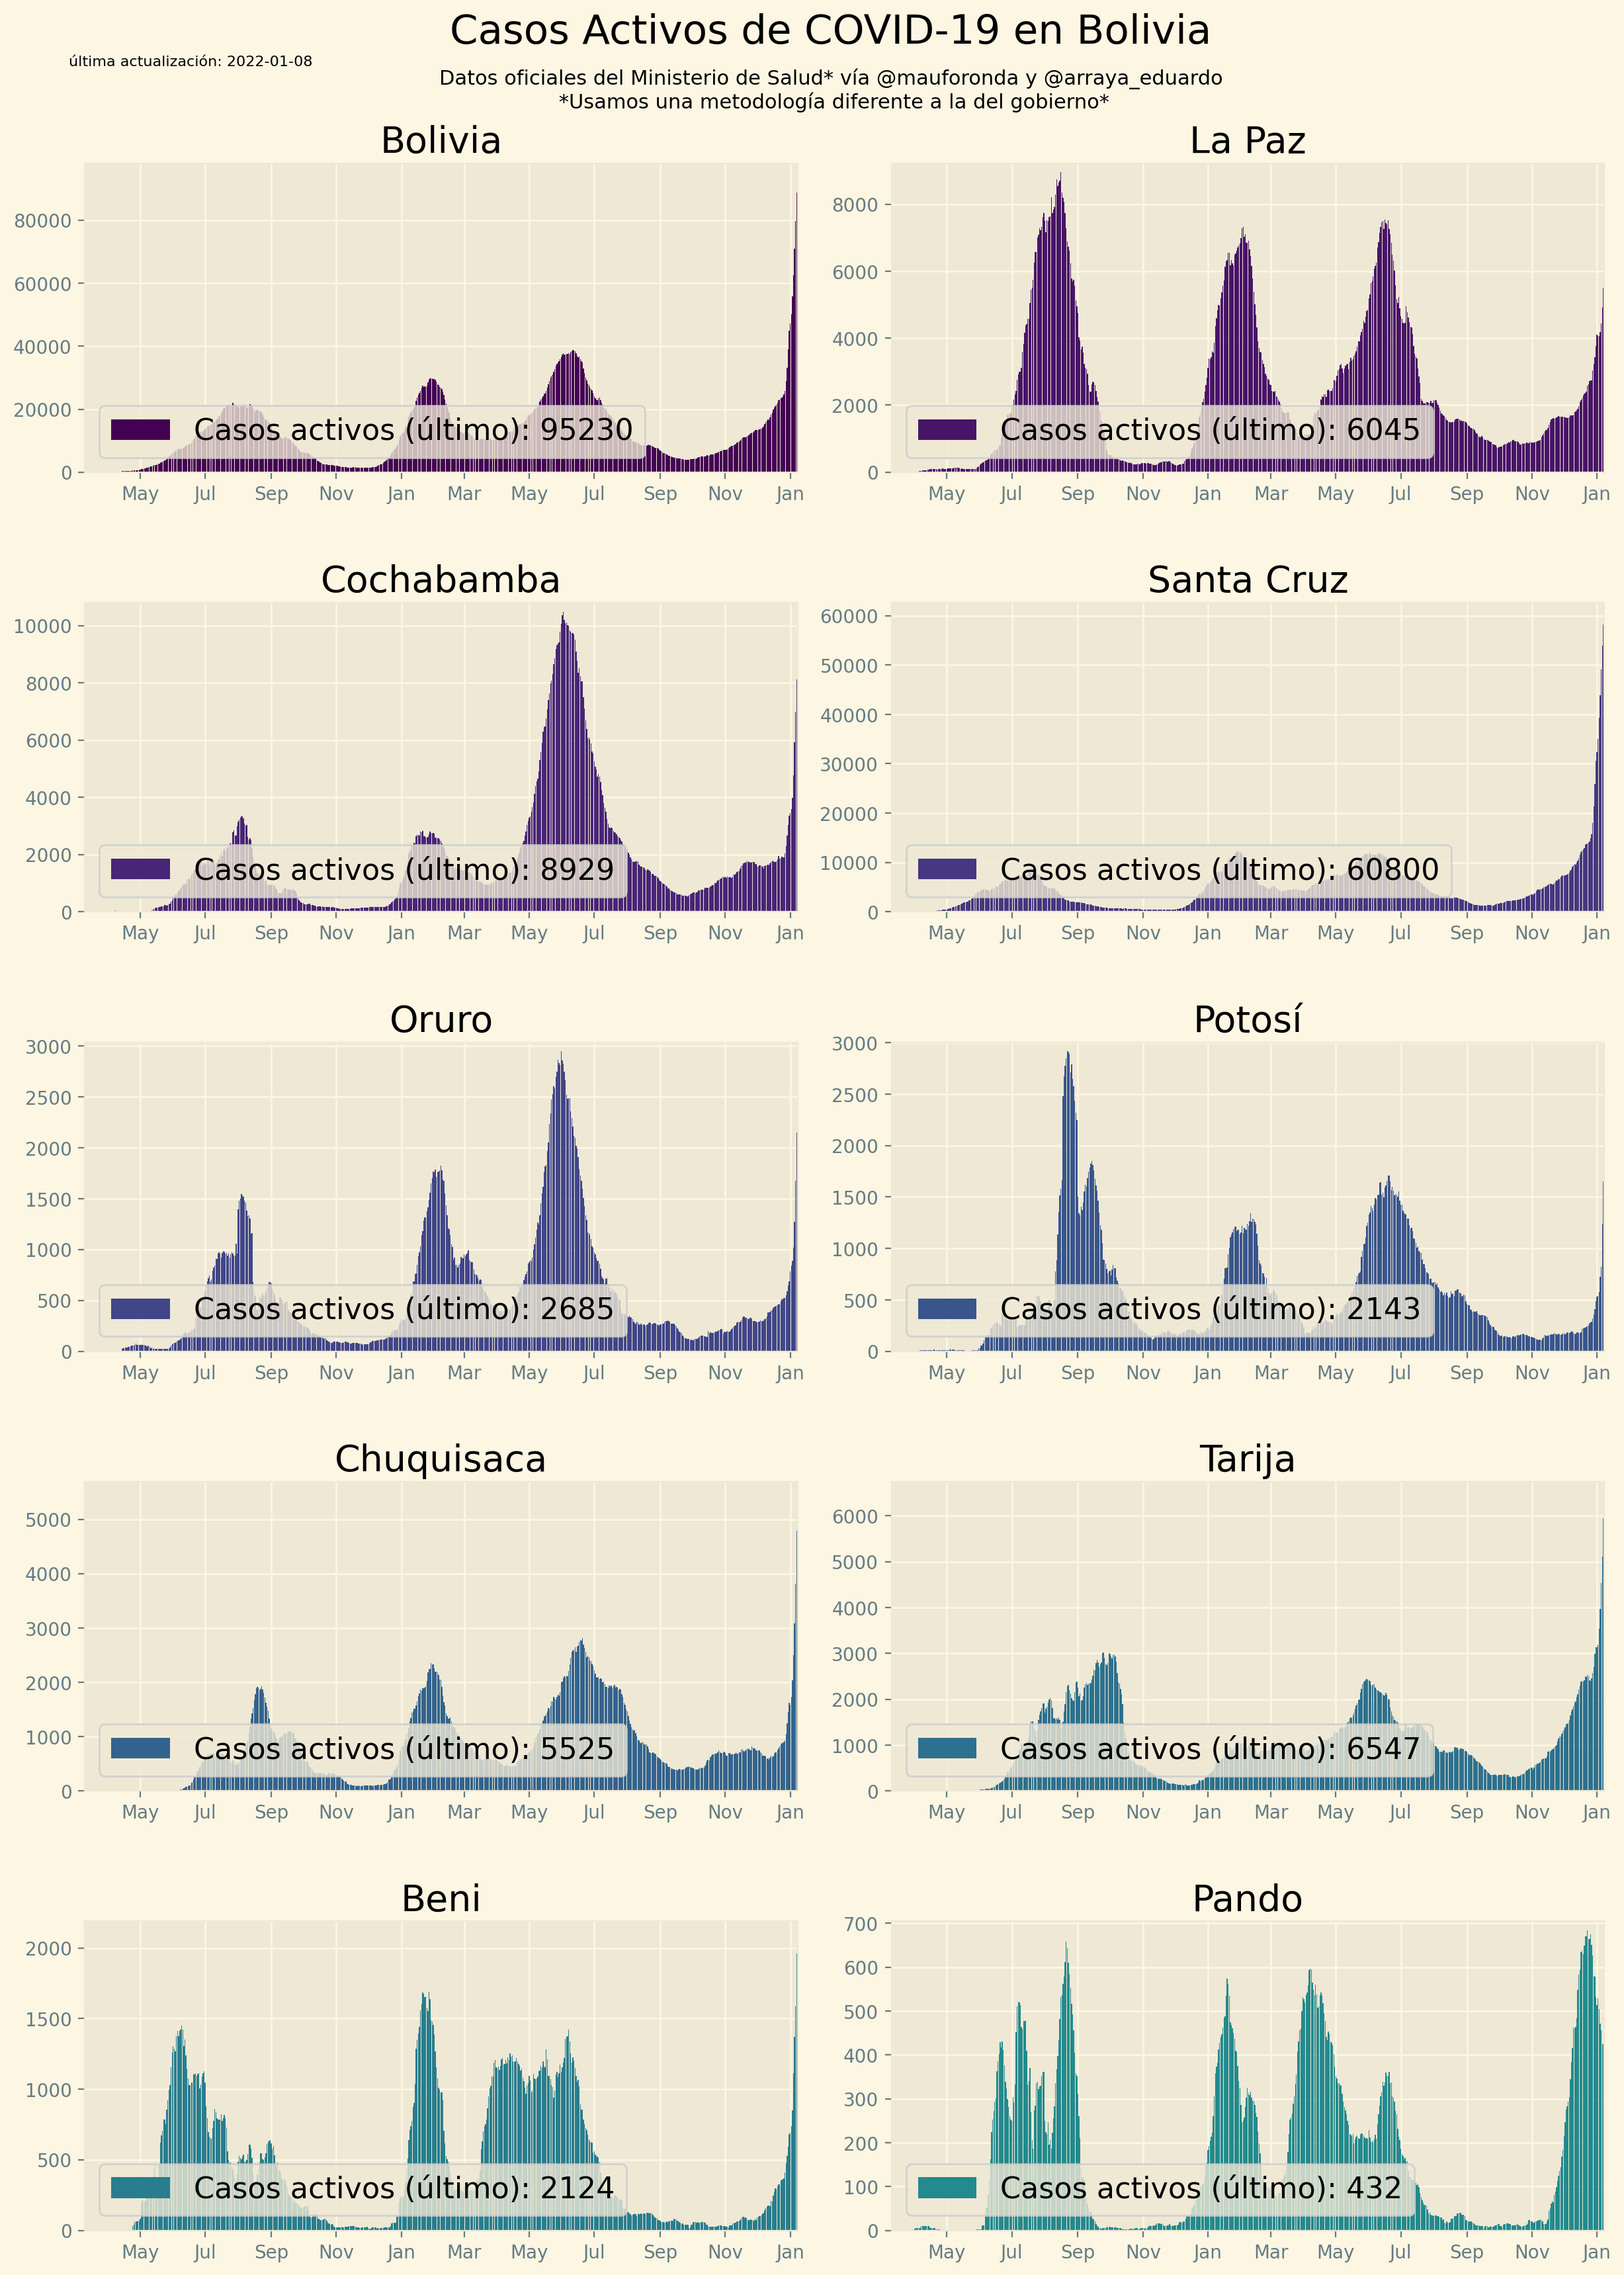

In [39]:
fig, axs = plt.subplots(5,2, figsize = (12,16), dpi=200)
axs = axs.flatten()
fig.tight_layout(pad=0.3, w_pad=2, h_pad=5)

# background_color = "#d0d0d0"
# background_color2 = "w"

# fig.set_facecolor(background_color)

fig.suptitle("Casos Activos de COVID-19 en Bolivia", fontsize= 22, y=1.065)
fig.text(0.5,1.02,"Datos oficiales del Ministerio de Salud* vía @mauforonda y @arraya_eduardo\n *Usamos una metodología diferente a la del gobierno*", fontsize=11, ha="center")
fig.text(.02, 1.04,"última actualización: {}".format(muertes_diarias.index[-1].date()), fontsize=8)

start_day = 0
for i in range(10):
    axs[i].grid(zorder=3)
    axs[i].set_title(activos.columns[i], fontsize=20) 
    axs[i].bar(activos.index, activos[activos[start_day:-1].columns[i]], label="Casos activos (último): {}".format(activos.iloc[-1,i].astype(int)),
              width=.85, zorder=2, 
              color = cm.get_cmap("viridis",20)(range(0,10))[i])
    # axs[i].set_facecolor(background_color2)
    axs[i].legend(fontsize=16, loc="lower left")
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter("%b"))
    axs[i].set_xlim(activos.index[start_day], activos.index[-1])
    axs[i].set_ylim(0, activos[activos[295:-1].columns[i]].max() * 1.03)

fig.savefig(directory + "graficas/activos.jpg", bbox_inches="tight")

In [40]:
activos_ultimo = activos[-1:]
activos_ultimo.T

2022-01-08
Bolivia        95230.0
La Paz          6045.0
Cochabamba      8929.0
Santa Cruz     60800.0
Oruro           2685.0
Potosí          2143.0
Chuquisaca      5525.0
Tarija          6547.0
Beni            2124.0
Pando            432.0

In [41]:
activos_ultimo.index = ["Activos por cada 10,000 habitantes"]
habitantes.index = ["Activos por cada 10,000 habitantes"]
activos_ultimo_pc = activos_ultimo / habitantes * 10000
activos_ultimo_pc.T


Activos por cada 10,000 habitantes
Bolivia                              81.953528
La Paz                               20.652545
Cochabamba                           44.006900
Santa Cruz                          180.415430
Oruro                                49.907063
Potosí                               23.758315
Chuquisaca                           86.734694
Tarija                              112.298456
Beni                                 44.250000
Pando                                28.051948

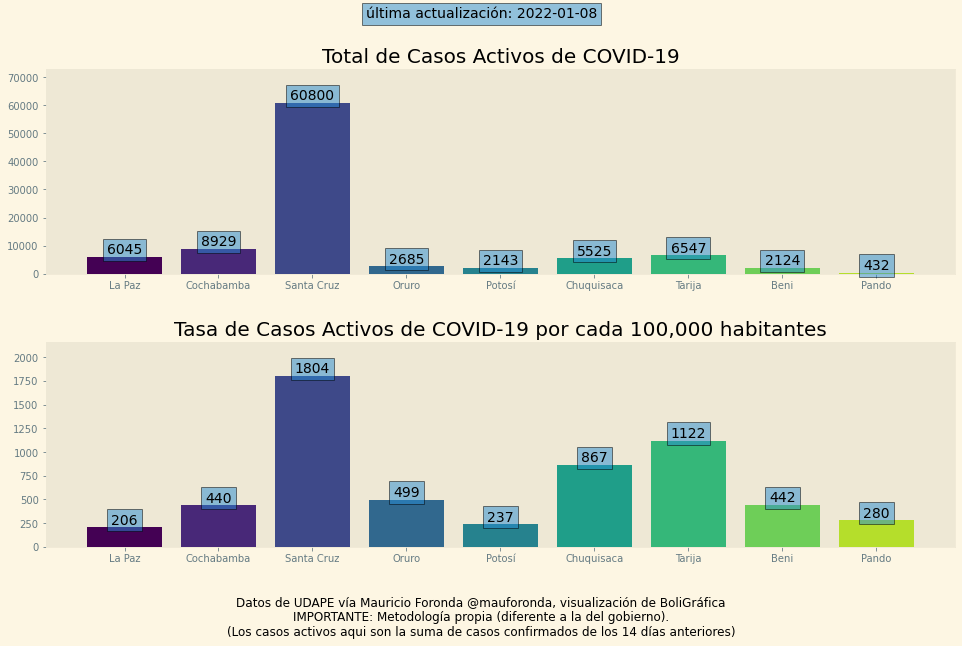

In [42]:
fig, axs = plt.subplots(2,1, figsize=(14,8))

fig.text(.5, 1,"última actualización: {}".format(muertes_diarias.index[-1].date()), fontsize=14, ha="center", bbox={"alpha":0.5})
fig.text(0.5,-.073,"Datos de UDAPE vía Mauricio Foronda @mauforonda, visualización de BoliGráfica\nIMPORTANTE: Metodología propia (diferente a la del gobierno).\n(Los casos activos aqui son la suma de casos confirmados de los 14 días anteriores)", 
         fontsize=12, ha="center")

bar1 = axs[0].bar(activos_ultimo.T.index[1:10], activos_ultimo.T[1:10][activos_ultimo.T.columns[0]], color = cm.get_cmap("viridis",10)(range(10)))
axs[0].set_title("Total de Casos Activos de COVID-19", fontsize = 20)
axs[0].set_ylim(0,activos_ultimo.T[1:10][activos_ultimo.T.columns[0]].max()*1.2)
axs[0].bar_label(bar1, fontsize=14,
                 bbox={
                     "alpha":0.5
                 })
axs[0].grid(axis="both")


bar2 = axs[1].bar(activos_ultimo_pc.T.index[1:10], (activos_ultimo_pc.T[1:10]["Activos por cada 10,000 habitantes"]*10).astype(int), color = cm.get_cmap("viridis",10)(range(10)))
axs[1].set_title("Tasa de Casos Activos de COVID-19 por cada 100,000 habitantes", fontsize = 20)
axs[1].bar_label(bar2, fontsize=14,
                 bbox={
                     "alpha":0.5
                 })
axs[1].grid(axis="both")
axs[1].set_ylim(0,activos_ultimo_pc.T[1:10][activos_ultimo_pc.T.columns[0]].max()*12)





fig.tight_layout(pad=3)

fig.savefig(directory + "graficas/activos_pc.jpg", bbox_inches = "tight")

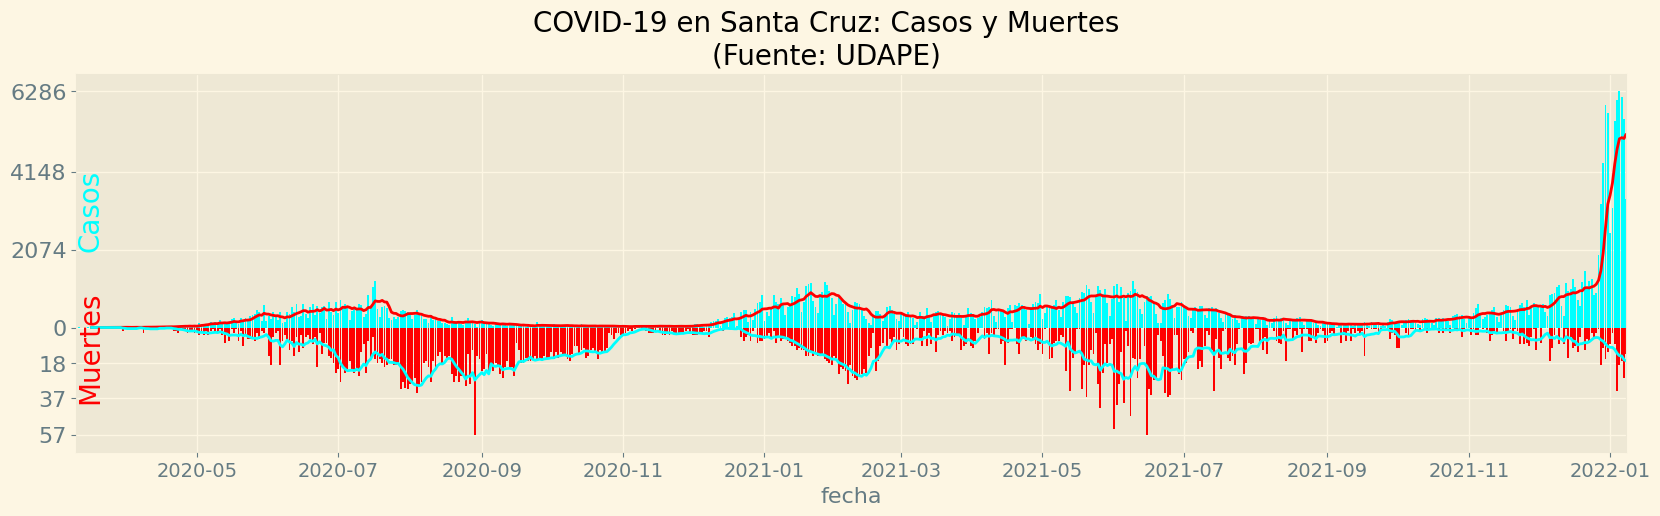

In [43]:

def plotter(region, start=0, end = -1, multiplier  = -50, bar_label=False):
    
    casos = casos_diarios.loc[:,region]
    muertes = muertes_diarias.loc[:,region]

    fig, axs = plt.subplots(1,1,figsize=(20,5), dpi=100)
    fig.suptitle("COVID-19 en {}: Casos y Muertes\n(Fuente: UDAPE)".format(region), fontsize=20, y =1.01)


    barc = axs.bar(casos.index, casos, color="cyan")   
    barm = axs.bar(muertes.index, muertes * multiplier, color="r")
    axs.plot(casos.index, casos.rolling(7).mean(), color="r")
    axs.plot(muertes.index, muertes.rolling(7).mean() * multiplier , color="cyan")

    axs.set_xlim(xmin=casos.index[start], xmax=casos.index[-1])
    # axs.set_ylim(muertes[start:].max()*-1.1, casos[start:].max()*1.2)
    axs.set_xlabel("fecha", fontsize=16)
    axs.set_yticks([casos.max()*1,
                    casos.max()*.66,
                    casos.max()*.33,
                    0,
                    muertes.max()*.33 * multiplier,
                    muertes.max()*.66 * multiplier,
                    muertes.max()* 1 * multiplier
                   ])
    axs.set_yticklabels([
                    int(casos.max()*1),
                    int(casos.max()*.66),
                    int(casos.max()*.33),
                    (0),
                    int(muertes.max()*.33),
                    int(muertes.max()*.66),
                    int(muertes.max()* 1)
                   ],
        fontsize=16
        )
    plt.xticks(fontsize=14)

    if bar_label==True:
        axs.bar_label(barc)
        axs.bar_label(barm)



    axs.annotate("Casos",
                xy=(casos.index[start], casos.max()*.35),
                fontsize=20,
                color="cyan",
                rotation=90)
    axs.annotate("Muertes",
                xy=(muertes.index[start], muertes.max()*.65*multiplier),
                fontsize=20,
                color="r",
                rotation=90)

###############################################################################################
###############################################################################################
###############################################################################################


   
# for i in casos_diarios.columns:
#     plotter(i)
    
plotter("Santa Cruz")


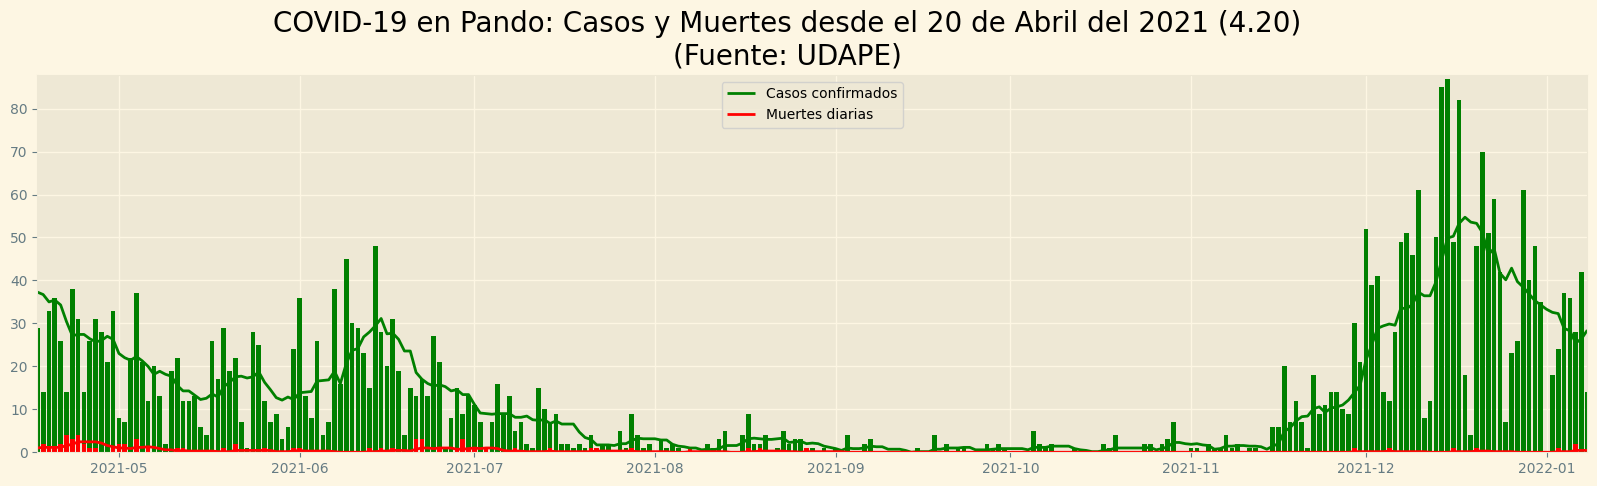

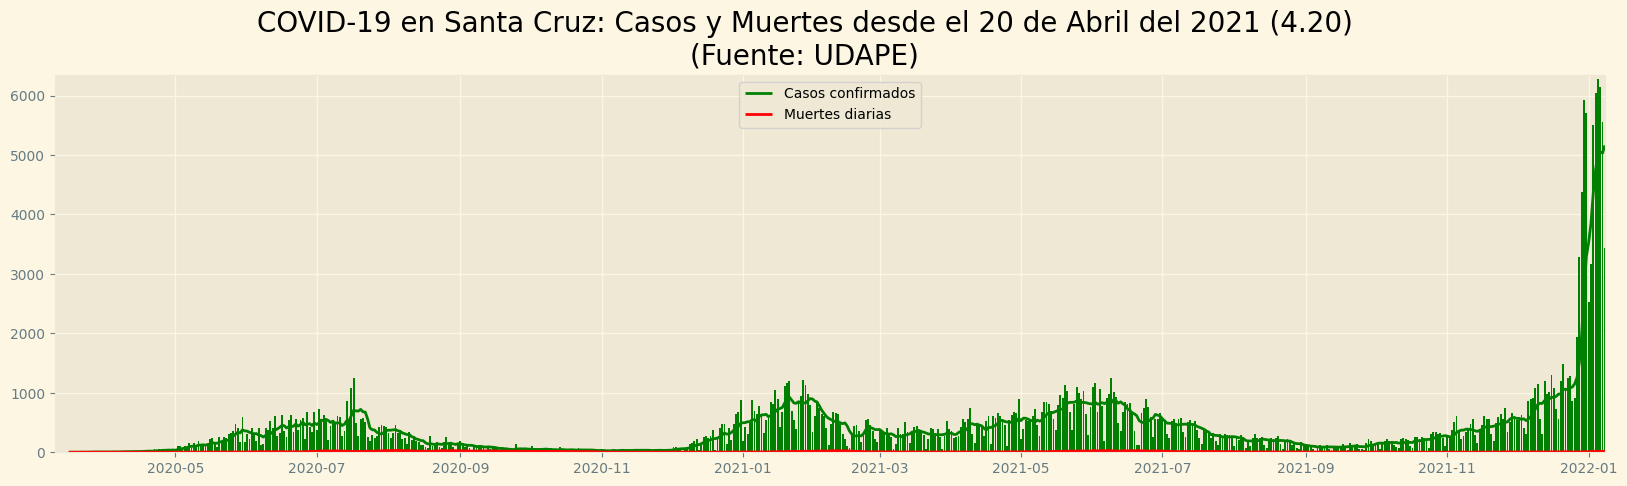

In [44]:
#explicacion de como funcionan los casos activos, malisima
def plotter1(region, start=0, extra=0, barlabels=False):

    casos = casos_diarios.loc[:,region]
    muertes = muertes_diarias.loc[:,region]

    fig, axs = plt.subplots(1,1,figsize=(20,5), dpi=100)
    fig.suptitle("COVID-19 en {}: Casos y Muertes desde el 20 de Abril del 2021 (4.20)\n(Fuente: UDAPE)".format(region), fontsize=20, y =1.01)


    barc = axs.bar(casos.index, casos, color="g")   
    barm = axs.bar(muertes.index, muertes, color="r")
    axs.plot(casos.index, casos.rolling(7).mean(), color="g", label="Casos confirmados")
    axs.plot(muertes.index, muertes.rolling(7).mean(), color="r", label="Muertes diarias")
    axs.set_xlim(xmin=casos.index[start], xmax=casos.index[-1])
    axs.set_ylim(0, casos[start:].max()*1.01) 
    axs.legend(loc="upper center")
    if barlabels ==True:
        axs.bar_label(barc)

plotter1("Pando", start=403)
plotter1("Santa Cruz", start=0)

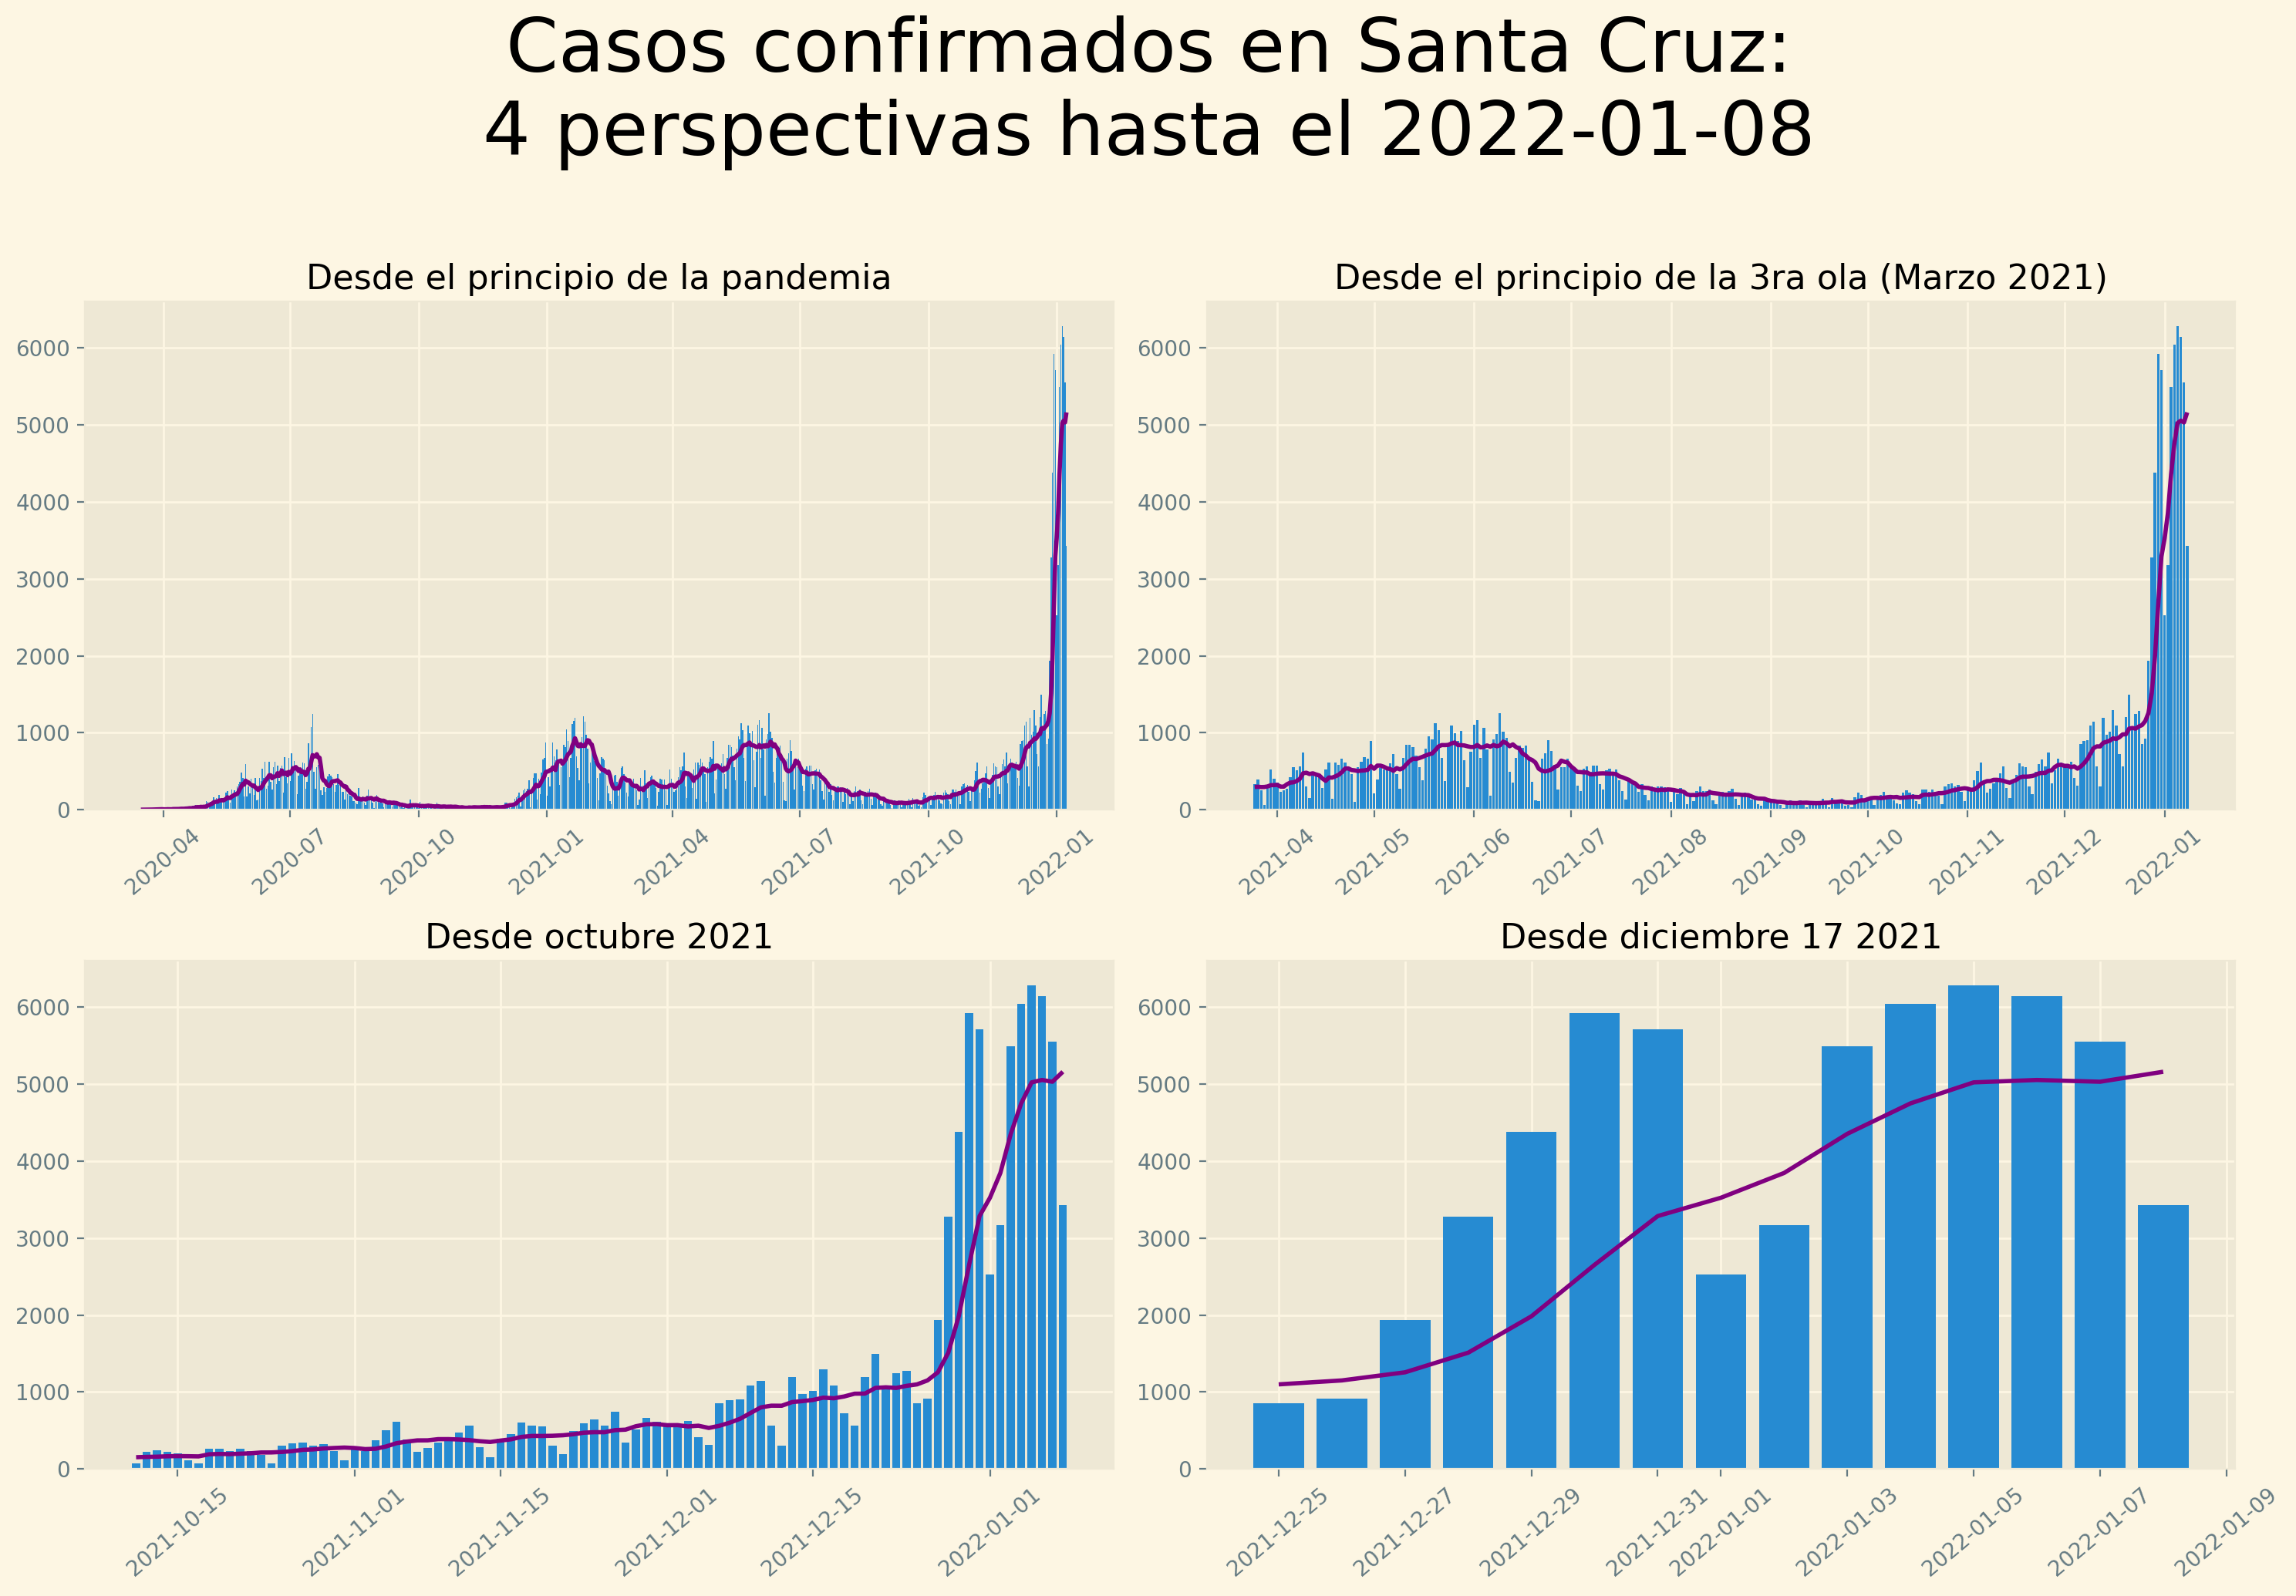

In [45]:
scz = casos_diarios["Santa Cruz"]
scz.index = pd.to_datetime(scz.index)

fig, axs = plt.subplots(2,2,figsize=(15,10), dpi=200)
axs= axs.flatten()

fig.suptitle("Casos confirmados en Santa Cruz:\n4 perspectivas hasta el {}".format(scz.index[-1].date()), fontsize=35, y=1.03)
axs[0].set_title('Desde el principio de la pandemia')
axs[0].bar(scz.index, scz)
axs[0].plot(scz.index, scz.rolling(7).mean(), color='purple')

axs[1].set_title('Desde el principio de la 3ra ola (Marzo 2021)')
lim2= -290
axs[1].bar(scz.index[lim2:], scz[lim2:])
axs[1].plot(scz.index[lim2:], scz.rolling(7).mean()[lim2:], color='purple')

axs[2].set_title('Desde octubre 2021')
lim3= -90
axs[2].bar(scz.index[lim3:], scz[lim3:])
axs[2].plot(scz.index[lim3:], scz.rolling(7).mean()[lim3:], color='purple')

axs[3].set_title('Desde diciembre 17 2021')
lim4= -15
axs[3].bar(scz.index[lim4:], scz[lim4:])
axs[3].plot(scz.index[lim4:], scz.rolling(7).mean()[lim4:], color='purple')

for i in range(4):
    axs[i].tick_params("x",rotation=40)
    
fig.tight_layout()

In [46]:
fig.savefig("graficas/Santa_cruz_comparacion_casos_grid.jpg", bbox_inches="tight")

# Letalidad

In [47]:
# s = "La tasa de letalidad es una métrica epidemiológica con dos variables: casos confirmados y muertes registradas.\n"+
# "Los casos y las muertes NO deben ser del mismo periodo ya que -en el caso del COVID-19- existe un periodo de 8-12 días\n"+
# "entre el dia de la confirmación del caso positivo (día de registro) y la muerte registrada.\n"+
# "\nLa única tasa de letalidad que sirve es la linea morada - que mide las muertes registradas del día (promedio móvil semanal)\n"+
# "entre los casos confirmados de 10 días ANTES (promedio móvil semanal). "

<module 'matplotlib.pyplot' from '/opt/hostedtoolcache/Python/3.9.9/x64/lib/python3.9/site-packages/matplotlib/pyplot.py'>

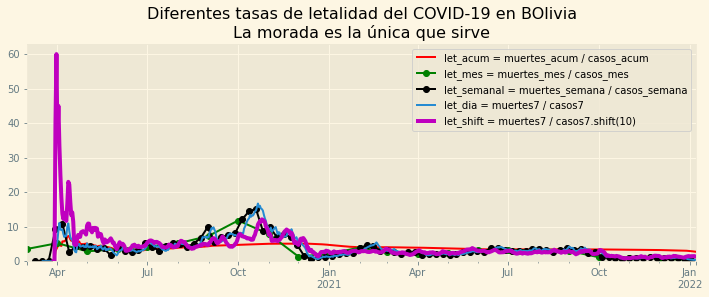

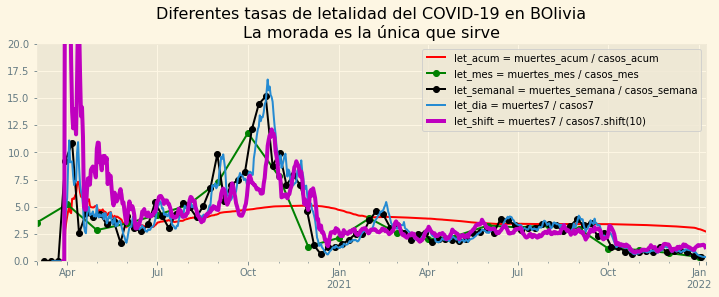

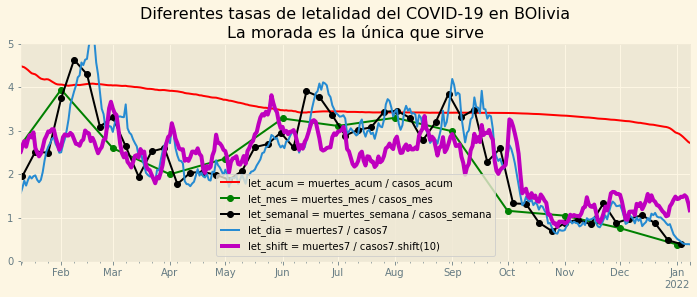

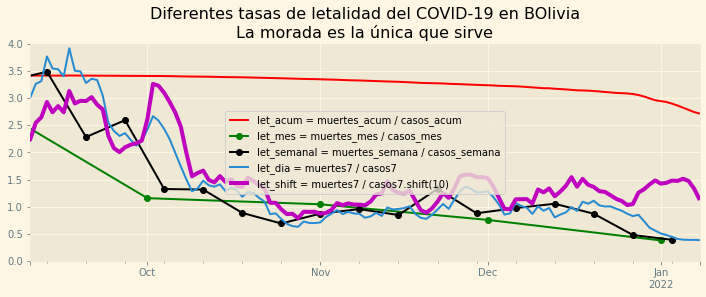

In [48]:
def letalidad_plot1(xmin = None, ymax=None):
    plt.figure(figsize= (12,4))

    let_acum = muertes_acumuladas / casos_acumulados *100
    let_acum.Bolivia.plot(subplots=True,  label="let_acum = muertes_acum / casos_acum", color="r")

    let_mes = muertes_diarias.resample("M").sum() / casos_diarios.resample("M").sum() *100
    let_mes.Bolivia.plot(subplots=True,  label="let_mes = muertes_mes / casos_mes", color="g", marker="o")

    let_semanal = muertes_diarias.resample("W").sum() / casos_diarios.resample("W").sum() *100
    let_semanal.Bolivia.plot(subplots=True,  label="let_semanal = muertes_semana / casos_semana", color="black", marker="o")

    let_dia = muertes_diarias7 / casos_diarios7 * 100
    let_dia.Bolivia.plot(subplots=True,  label="let_dia = muertes7 / casos7")

    shifted_days = 10
    let_shifted = muertes_diarias7 / casos_diarios7.shift(1 * shifted_days) * 100
    let_shifted.Bolivia.plot(subplots=True, zorder=5, label="let_shift = muertes7 / casos7.shift(10)", color="m", linewidth=4, ls="-")

    plt.xlim(xmin,casos_diarios7.index[-1])
    plt.ylim(0,ymax)
    plt.title("Diferentes tasas de letalidad del COVID-19 en BOlivia\nLa morada es la única que sirve")
    plt.legend()
    return plt
    # plt.text(x = casos_diarios7.index[320],y=-30, ha="center",
    #          s = "La tasa de letalidad es una métrica epidemiológica con dos variables: casos confirmados y muertes registradas.\n"+
    #          "Los casos y las muertes NO deben ser del mismo periodo ya que -en el caso del COVID-19- existe un periodo de 8-12 días\n"+
    #          "entre el dia de la confirmación del caso positivo (día de registro) y la muerte registrada.\n"+
    #          "\nLa única tasa de letalidad que sirve es la linea morada - que mide las muertes registradas del día (promedio móvil semanal)\n"+
    #          "entre los casos confirmados de 10 días ANTES (promedio móvil semanal). ")
#------------------------------------------------------------------

letalidad_plot1(xmin = None, ymax=None)    
letalidad_plot1(xmin = None, ymax=20)    

letalidad_plot1(xmin = "2021-01-10", ymax=5)
letalidad_plot1(xmin = "2021-09-10", ymax=4)

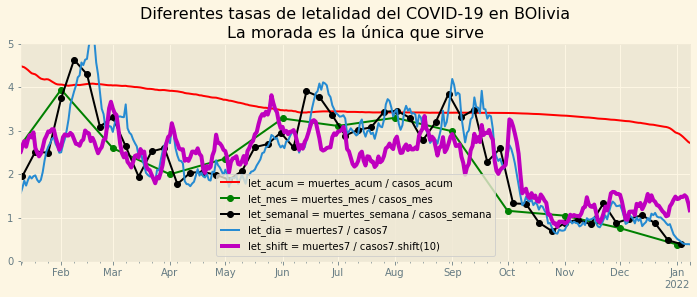

In [49]:
letalidad_saved = letalidad_plot1(xmin = "2021-01-10", ymax=5)
letalidad_saved.savefig("graficas/letalidad_overlay.jpg", bbox_inches="tight")

# Mortalidad / Exceso de muertes

In [50]:
exceso_edu = pd.read_csv("https://raw.githubusercontent.com/pr0nstar/covid19-data/master/raw/bolivia/sereci/sereci.by.death.date.csv", index_col=0)
exceso_edu.index = pd.to_datetime(exceso_edu.index, format="%Y-%m")
exceso_edu["Bolivia"] = exceso_edu.sum(axis=1)
exceso_edu

La Paz  Cochabamba  Santa Cruz  Oruro  Potosi  Tarija  Chuquisaca  \
2019-01-01    1338         813        1132    253     368     247         273   
2019-02-01    1266         709         887    214     303     203         242   
2019-03-01    1331         788        1024    251     351     222         265   
2019-04-01    1314         766         995    228     291     227         219   
2019-05-01    1372         813         970    252     354     198         221   
2019-06-01    1503         815         983    275     340     204         265   
2019-07-01    1496         904        1080    277     368     256         283   
2019-08-01    1434         839        1069    252     378     220         247   
2019-09-01    1354         793         975    241     295     207         239   
2019-10-01    1345         821        1033    227     337     227         243   
2019-11-01    1209         707         815    248     254     226         244   
2019-12-01    1348         865        1115    267     345     250         280   
2020-01-01    1443         852        1218    252     353     222         285   
2020-02-01    1329         753        1104    241     306     201         219   
2020-03-01    1332         800        1342    211     274     227         244   
2020-04-01    1088         576         591    198     181     141         171   
2020-05-01    1213         670        1308    192     251     174         196   
2020-06-01    1787        1425        3422    333     321     188         229   
2020-07-01    7451        2757        2339   1148     693     360         548   
2020-08-01    4608        1403        1498    742     972     506         641   
2020-09-01    1695         784        1156    302     434     337         321   
2020-10-01    1449         821        1196    283     406     287         305   
2020-11-01    1383         852        1150    242     343     228         231   
2020-12-01    1600         757        1139    264     324     239         247   
2021-01-01    4372        1029        1787    495     543     284         334   
2021-02-01    2643         952        1391    452     476     296         290   
2021-03-01    1835        1007        1309    393     435     361         319   
2021-04-01    1513        1025        1265    304     338     261         259   
2021-05-01    2041        2006        2144    648     466     345         397   
2021-06-01    2634        2377        2443    672     705     348         510   
2021-07-01    2330        1433        1953    375     663     367         550   
2021-08-01    1913        1117        1497    348     545     338         419   
2021-09-01    1640         976        1242    323     428     272         310   

            Beni  Pando  Bolivia  
2019-01-01   131     19     4574  
2019-02-01   130     13     3967  
2019-03-01   136     16     4384  
2019-04-01   164     22     4226  
2019-05-01   161     16     4357  
2019-06-01   144     16     4545  
2019-07-01   167     23     4854  
2019-08-01   178     19     4636  
2019-09-01   185     13     4302  
2019-10-01   150     22     4405  
2019-11-01   138     20     3861  
2019-12-01   183     20     4673  
2020-01-01   187     16     4828  
2020-02-01   185     26     4364  
2020-03-01   163     22     4615  
2020-04-01    67     10     3023  
2020-05-01   334     15     4353  
2020-06-01   464     54     8223  
2020-07-01   463    117    15876  
2020-08-01   233     34    10637  
2020-09-01   149     31     5209  
2020-10-01   168     17     4932  
2020-11-01   160     12     4601  
2020-12-01   160     26     4756  
2021-01-01   234     48     9126  
2021-02-01   200     33     6733  
2021-03-01   267     39     5965  
2021-04-01   298     60     5323  
2021-05-01   257     33     8337  
2021-06-01   230     23     9942  
2021-07-01   223     26     7920  
2021-08-01   183     18     6378  
2021-09-01   182     22     5395

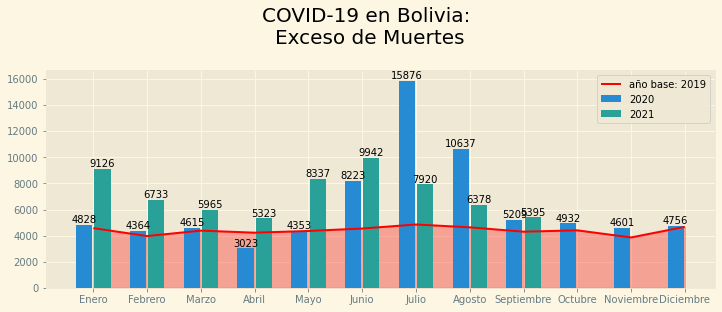

In [51]:
fig, axs = plt.subplots(1,1, figsize=(12,4))
fig. suptitle("COVID-19 en Bolivia: \nExceso de Muertes", fontsize=20, y=1.1)

axs.plot(exceso_edu[exceso_edu.index.year ==2019].index.month, exceso_edu[exceso_edu.index.year ==2019].Bolivia, label="año base: 2019", color="r")
axs.fill_between(exceso_edu[exceso_edu.index.year ==2019].index.month, exceso_edu[exceso_edu.index.year ==2019].Bolivia, alpha=.3, color="r")

pad = .17
width = .3
bar1 = axs.bar(exceso_edu[exceso_edu.index.year ==2020].index.month-pad, exceso_edu[exceso_edu.index.year ==2020].Bolivia, width = width, label="2020")
bar2 = axs.bar(exceso_edu[exceso_edu.index.year ==2021].index.month+pad, exceso_edu[exceso_edu.index.year ==2021].Bolivia, width = width, label="2021")

axs.bar_label(bar1)
axs.bar_label(bar2)
axs.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
axs.set_xticklabels(["Enero","Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"])

axs.legend()

In [52]:
fig.savefig("graficas/exceso_bolivia1.jpg", bbox_inches="tight")